In [555]:
import pandas as pd
import numpy as np
import gurobipy as gp
import matplotlib.pyplot as plt
# set the max columns to none
pd.set_option('display.max_columns', None)
# set the max rows to none
pd.set_option('display.max_rows', None)

In [556]:
stocks_2019 = pd.read_csv(r'stocks2019.csv')
stocks_2020 = pd.read_csv(r'stocks2020.csv')


In [557]:
stocks_2019.head()

,X,NDX,ATVI,ADBE,AMD,ALXN,ALGN,GOOGL,GOOG,AMZN,AMGN,ADI,ANSS,AAPL,AMAT,ASML,ADSK,ADP,BIDU,BIIB,BMRN,BKNG,AVGO,CDNS,CDW,CERN,CHTR,CHKP,CTAS,CSCO,CTXS,CTSH,CMCSA,CPRT,COST,CSX,DXCM,DOCU,DLTR,EBAY,EA,EXC,EXPE,FB,FAST,FISV,GILD,IDXX,ILMN,INCY,INTC,INTU,ISRG,JD,KLAC,KHC,LRCX,LBTYA,LBTYK,LULU,MAR,MXIM,MELI,MCHP,MU,MSFT,MRNA,MDLZ,MNST,NTES,NFLX,NVDA,NXPI,ORLY,PCAR,PAYX,PYPL,PEP,PDD,QCOM,REGN,ROST,SGEN,SIRI,SWKS,SPLK,SBUX,SNPS,TMUS,TTWO,TSLA,TXN,TCOM,ULTA,VRSN,VRSK,VRTX,WBA,WDAY,WDC,XEL,XLNX
0,2019-01-02,6360.870117,46.350380,224.570007,18.830000,98.050003,202.119995,1054.680054,1045.849976,1539.130005,182.458298,82.851608,143.009995,38.629097,32.536137,153.048553,128.960007,125.159172,162.250000,304.690002,84.959999,1721.699951,235.462082,43.230000,77.528900,51.063816,287.989990,103.500000,165.878006,40.382099,99.968712,61.649429,33.121780,47.680000,201.447266,60.481594,115.180000,40.820000,91.199997,28.105513,80.370003,41.527340,110.296707,135.679993,24.559025,72.209999,59.370525,182.460007,294.519989,63.560001,45.145596,191.825531,466.029999,21.270000,87.492149,39.393467,133.541534,21.360001,20.700001,123.349998,105.518723,47.961525,298.010010,69.420082,32.750000,98.860214,15.330000,38.419731,48.759998,44.063419,267.660004,135.506561,73.355392,341.149994,54.536522,61.546516,85.750000,103.860535,22.209999,54.205219,372.440002,82.688972,57.490002,5.816079,65.834534,103.320000,62.150398,84.050003,65.260002,104.010002,62.023998,89.888748,27.590000,247.970001,147.759995,107.364159,164.080002,63.920757,159.740005,36.312473,46.041862,84.600266
1,2019-01-03,6147.129883,44.704514,215.699997,17.049999,100.209999,184.779999,1025.469971,1016.059998,1500.280029,179.681961,77.846962,137.639999,34.781353,30.650827,144.607849,121.849998,121.379601,154.710007,307.000000,84.199997,1663.119995,214.517471,41.529999,75.531197,49.911999,287.500000,102.349998,163.223785,38.913486,98.530945,59.704865,33.381977,46.889999,197.177475,59.534588,112.260002,38.830002,90.760002,27.589191,78.709999,41.574455,106.888710,131.740005,23.861574,70.110001,61.064423,178.020004,284.239990,68.059998,42.662006,185.956436,450.239990,20.350000,82.583893,39.366199,127.101006,21.389999,20.570000,124.360001,99.902061,45.235149,296.589996,64.526123,31.000000,95.223351,15.500000,38.275265,48.000000,42.367931,271.200012,127.319656,70.363708,346.130005,53.273495,60.506081,82.089996,102.891121,21.520000,52.599842,372.079987,81.998093,56.369999,5.855510,58.820972,100.809998,59.454502,81.110001,65.019997,99.150002,60.071999,84.587738,26.959999,243.360001,142.589996,104.083450,163.729996,63.253742,154.020004,33.835327,45.860447,81.414970
2,2019-01-04,6422.669922,46.488358,226.190002,19.000000,106.000000,186.710007,1078.069946,1070.709961,1575.390015,185.824142,79.736969,143.660004,36.266144,32.749928,150.864944,128.279999,126.217102,160.949997,318.329987,87.099998,1717.550049,216.625854,43.259998,76.265640,51.418221,302.739990,105.349998,170.899200,40.666344,100.389267,62.245499,34.509483,48.560001,202.903336,61.301678,116.239998,40.900002,92.889999,28.222414,84.419998,42.045605,111.390015,137.949997,24.840874,73.220001,63.871971,187.429993,302.690002,72.269997,45.279839,193.334717,471.679993,22.270000,87.867485,40.438751,133.309784,22.770000,21.980000,128.550003,105.862404,47.225689,315.329987,67.143379,32.700001,99.652115,16.959999,39.334717,49.790001,44.065342,297.570007,135.476715,73.766022,341.820007,55.639317,62.615330,86.269997,105.001030,22.690001,53.449738,397.549988,84.228653,59.540001,6.082238,61.639961,108.040001,61.425697,83.900002,67.489998,101.699997,63.537998,88.413605,28.549999,255.029999,148.970001,108.678413,172.699997,65.358139,163.350006,35.268467,46.309223,85.184715
3,2019-01-07,6488.250000,47.799141,229.259995,20.570000,107.940002,189.919998,1075.920044,1068.390015,1629.510010,188.324738,80.238388,147.320007,36.185429,33.333015,154.311707,132.720001,125.534264,162.600006,322.399994,90.190002,1711.819946,221.037689,43.419998,75.962067,51.122887,301.470001,104.8700

In [558]:

#Number of day in 2019 for which the stock market was active
days_2019 = stocks_2019.shape[0]
days_2019

251

In [559]:
#Number of stocks in the 2019 dataset (First two columns removed as they are the 'Date' and 'Index')
n = stocks_2019.shape[1]-2
n

100

Data Description   

X - Timeperiod : We have day-level stock value  
NDX - Index value for the particular day   
The Next 100 columns are the stocks with their respective price for each day   

Problem Overview   
Equity money management strategies are largely classified as either ‘active’ or ‘passive’. The most common passive strategy is that of “indexing” where the goal is to choose a portfolio that mirrors the movements of the broad market population or a market index. Such a portfolio is called an index fund. For example, the QQQ Index fund tracks the NASDAQ-100 index.   
Constructing an index fund that tracks a specific broad market index could be done by simply purchasing all n stocks in the index, with the same weights as in the index. However, this approach is impractical (many small positions) and expensive (rebalancing costs may frequently be incurred, price response to trading). An index fund with m stocks, where m is substantially smaller than the size of the target population, n, seems desirable.

First, we need to calculate the returns from each stock on a day-to-day basis. Then we need to get the correlation of each stock with repect to all the other stocks. This will help us find the the best m stocks that can mimick the index to an extent.

### Q1 - Getting the returns matrix and calculating the correlation

In [560]:
returns_2019 = stocks_2019.copy()  # Create a copy of the original DataFrame
returns_2019.drop(columns=['X'], inplace=True)  # Drop the 'Date' column

# Calculate daily returns
returns_2019 = returns_2019.pct_change().fillna(0)

In [561]:
#Now, lets calculate the correlation matrix --> This will give us the correlation of the 'RETURNS' from each stock with repect to each other

correl_2019 = returns_2019.drop(columns=['NDX']).corr()

### Q2 - Stock Selection

Now that we have the correlation matrix for the returns we can build an optimization problem to pick m stocks that maximizes the correlation between the selected stock and representative from the NASDAQ index.

In [593]:
m = 5

fund_creator = gp.Model() 
selected_stocks = fund_creator.addMVar(100, vtype = 'B') #Binary variable to flag the selected stocks
linking_stocks = fund_creator.addMVar((100,100), vtype = 'B') #Binary variable to link stock in index to the fund

selection_const = fund_creator.addConstr(gp.quicksum(selected_stocks[i] for i in range(n)) <= m)
one_representative_const = fund_creator.addConstrs(gp.quicksum(linking_stocks[i,j] for j in range(n)) ==1 for i in range(n))
ensure_best_representative_const = fund_creator.addConstrs(linking_stocks[i,j] <= selected_stocks[j] for j in range(n) for i in range(n))

# Set the objective function using the calculated values
fund_creator.setObjective(gp.quicksum(correl_2019.iloc[i, j] * linking_stocks[i,j] for i in range(n) for j in range(n) ), sense=gp.GRB.MAXIMIZE)
fund_creator.Params.OutputFlag = 0
fund_creator.optimize()

# Convert the array to a pandas Series for easier manipulation
selection_series = pd.Series(selected_stocks.x)

# Get the selected columns from returns_2019
selected_columns = correl_2019.columns[selection_series == 1]
selected_columns_list = selected_columns.tolist()
# Print the names of the selected columns
selected_columns_list

['LBTYK', 'MXIM', 'MSFT', 'VRTX', 'XEL']

#### Now lets see how these 5 stocks rank in terms of being correlated with other stocks in the dataset

The way we have optimized the model will map each stock in the NASDAQ index to one stock in the fund we create. So lets understand the importance of the stocks in the fund based on how many index stocks are mapped to them (representations). 

,stock,representations_from_index
0,MSFT,53.0
1,MXIM,30.0
2,VRTX,10.0
3,XEL,4.0
4,LBTYK,3.0


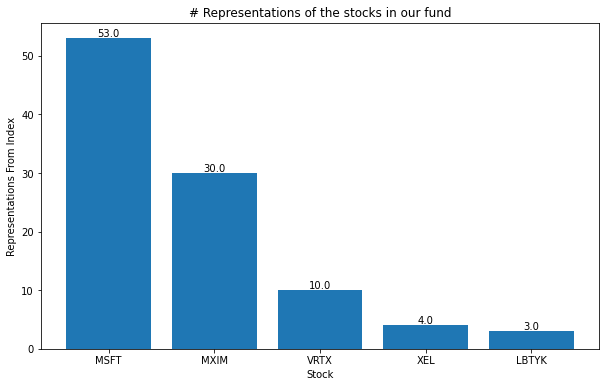

In [594]:

linking_stocks_df = pd.DataFrame(linking_stocks.x.tolist())
linking_stocks_df.columns = correl_2019.columns
linkings_graph = linking_stocks_df.sum().sort_values(ascending = False).head(m)
linkings_graph = pd.DataFrame(linkings_graph).reset_index()
linkings_graph.columns = ['stock','representations_from_index']
display(linkings_graph)
# # Plot the data as a bar graph
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
bars = plt.bar(linkings_graph['stock'], linkings_graph['representations_from_index'])
plt.xlabel('Stock')
plt.ylabel('Representations From Index')
plt.title('# Representations of the stocks in our fund')

# Add labels with values on top of the bars
for bar in bars:
    value = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, value, str(value), ha='center', va='bottom')


# # Show the plot
plt.show()

From the above chart we see that MSFT (Microsoft) is the most representative stock out the top 5 we have selected! Now let's try to see how its return trends with the index returns to make more sense out of the optimization.

In [595]:
#Now let's create a dataframe that only has the selected stocks from the above optimzation output

selected_stocks = returns_2019[selected_columns_list]
index_2019 = returns_2019['NDX']


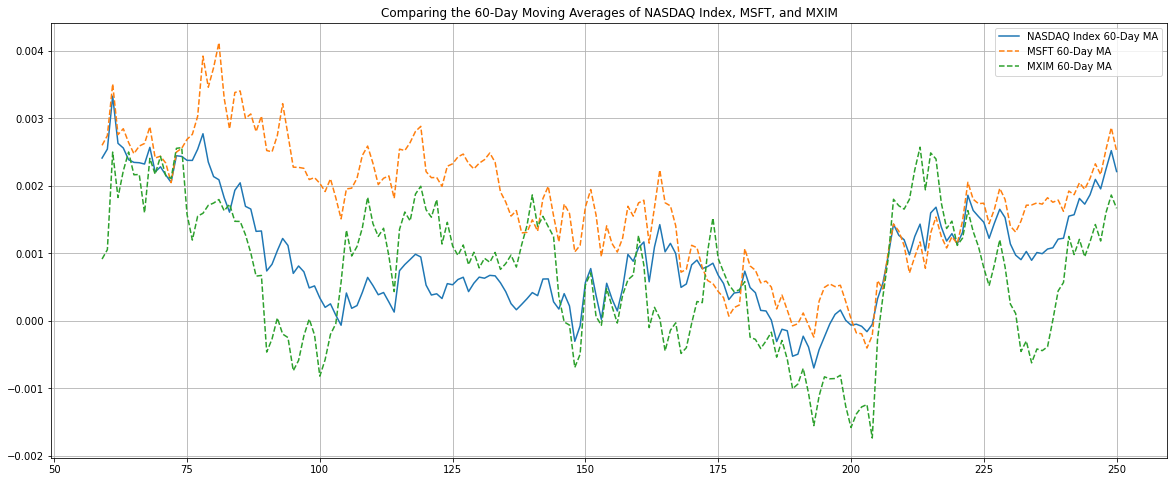

In [596]:
# Calculate the 60-day moving average for the NASDAQ Index
moving_avg_index_2019 = index_2019.rolling(window=60).mean()

# Calculate the 60-day moving average for MSFT
moving_avg_MSFT = selected_stocks['MSFT'].rolling(window=60).mean()

# Calculate the 60-day moving average for MXIM
moving_avg_MXIM = selected_stocks['MXIM'].rolling(window=60).mean()

# Create the main figure with one subplot
fig, ax = plt.subplots(figsize=(20, 8))

# Plot the 60-day moving averages for NASDAQ Index, MSFT, and MXIM
ax.plot(moving_avg_index_2019, label='NASDAQ Index 60-Day MA', linestyle='-')
ax.plot(moving_avg_MSFT, label='MSFT 60-Day MA', linestyle='--')
ax.plot(moving_avg_MXIM, label='MXIM 60-Day MA', linestyle='--')

# Title and legend for the subplot
ax.set_title('Comparing the 60-Day Moving Averages of NASDAQ Index, MSFT, and MXIM')
ax.legend()

# Add a grid
ax.grid(True)

# Show the plot
plt.show()


MSFT tracks the index decently. Its increase / decrease is correlated with the index but the magnitude of the return are quite different and it can be seen clearly from the chart. MXIM tracks the NASDAQ index on and off. Similar to MSFT, its magnitude of returns is quite different from the index. The remaining 3 stocks in the fund, though not as highly representative as these two, will track the index to an extent. 

**These finidings builds confidence in the approach that we have taken to select the stocks for our fund based on correlation**



### Q2 - Portfolio Weights calculation

Now let's identify how much of each selected stock should we have in our fund. This is identified by optimizing to achieve minimum difference between the NASDAQ index and weighted returns from the selected stocks. The weights here represent the % of stock in the fund.

In [597]:
portfolio = gp.Model()
portfolio_weights = portfolio.addMVar(5)
index_diff = portfolio.addMVar(days_2019)
portfolio_weights_const = portfolio.addConstr(gp.quicksum(portfolio_weights[i] for i in range(m)) == 1)

mod_const_1 = portfolio.addConstrs(
    (gp.quicksum(portfolio_weights[i] * selected_stocks.iloc[j, i] for i in range(m)) - index_2019[j]) <= index_diff[j]
    for j in range(days_2019)
)
mod_const_2 = portfolio.addConstrs(
    (-1 * gp.quicksum(portfolio_weights[i] * selected_stocks.iloc[j, i] for i in range(m)) + index_2019[j]) <= index_diff[j]
    for j in range(days_2019)
)
portfolio.setObjective(gp.quicksum(index_diff[i] for i in range(days_2019)), sense = gp.GRB.MINIMIZE)
portfolio.Params.OutputFlag = 0
portfolio.optimize()



Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored


In [598]:
print('\n The difference between 2019 NASDAQ Index return and our fund return = ', round(portfolio.objval,2),'\n \n', 'The weights assignd to stocks in our funds are -')

portfolio_weights_df = pd.DataFrame()
portfolio_weights_df['stock'] = selected_columns_list
portfolio_weights_df['weights'] = portfolio_weights.x.tolist()

portfolio_weights_df = portfolio_weights_df.sort_values('weights', ascending = False)
portfolio_weights_df


 The difference between 2019 NASDAQ Index return and our fund return =  0.79 
 
 The weights assignd to stocks in our funds are -


,stock,weights
2,MSFT,0.580352
1,MXIM,0.210388
4,XEL,0.089208
3,VRTX,0.071190
0,LBTYK,0.048862


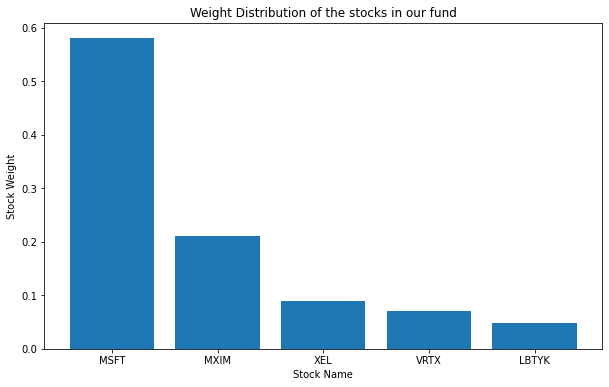

In [599]:
# # Plot the data as a bar graph
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
bars = plt.bar(portfolio_weights_df['stock'], portfolio_weights_df['weights'])
plt.xlabel('Stock Name')
plt.ylabel('Stock Weight')
plt.title('Weight Distribution of the stocks in our fund')


# # Show the plot
plt.show()

**The weights assigned to our stocks in the fund are in line with how well they represent the index!**   

MSFT and MXIM were the most representative stocks, and they have also been assigned the highest weights.

##### Now Lets find out how well our fund tracks the 2020 returns


In [600]:
returns_2020 = stocks_2020.copy()  # Create a copy of the original DataFrame
returns_2020.drop(columns=['Unnamed: 0'], inplace=True)  # Drop the 'Date' column if it exists
returns_2020 = returns_2020.pct_change()
returns_2020 = returns_2020.fillna(0)
index_2020 = returns_2020['NDX']


In [604]:

#Now lets filter the 2020 return dataset for the selected stocks
fil_2020_returns = returns_2020[selected_columns_list]
weight_x = portfolio_weights_df['weights']
weighted_fil_2020_return = pd.DataFrame()
for i,col in enumerate(fil_2020_returns.columns):
    weighted_fil_2020_return[col] = fil_2020_returns[col]*weight_x[i]
weighted_fil_2020_return['total_returns_fund'] = weighted_fil_2020_return[selected_columns_list].sum(axis=1)
m_5_2020_error = sum(abs(returns_2020['NDX'] - weighted_fil_2020_return['total_returns_fund']))

print('\nThe difference between the 2019 NASDAQ Index and the fund we have created (Training error) = ', round(portfolio.objval,2),'\n')

print('The difference between the 2020 NASDAQ Index and the fund we have created (Testing error) = ' , round(m_5_2020_error,2))


The difference between the 2019 NASDAQ Index and the fund we have created (Training error) =  0.79 

The difference between the 2020 NASDAQ Index and the fund we have created (Testing error) =  1.11


### Lets iterate through various different values of m

In [481]:
m_array = [5,10,20,30,40,50,60,70,80,90,100] 

In [626]:
selected_stock_dictionary = {}
weights_dictionary = {}
objective_selected_stock = []
for m in m_array:
    
    if n>=m:
    
        fund_creator = gp.Model() 
        selected_stocks = fund_creator.addMVar(100, vtype = 'B') #Binary variable to flag the selected stocks
        linking_stocks = fund_creator.addMVar((100,100), vtype = 'B') #Binary variable to link stock in index to the fund

        selection_const = fund_creator.addConstr(gp.quicksum(selected_stocks[i] for i in range(n)) <= m)
        one_representative_const = fund_creator.addConstrs(gp.quicksum(linking_stocks[i,j] for j in range(n)) ==1 for i in range(n))
        ensure_best_representative_const = fund_creator.addConstrs(linking_stocks[i,j] <= selected_stocks[j] for j in range(n) for i in range(n))

        # Set the objective function using the calculated values
        fund_creator.setObjective(gp.quicksum(correl_2019.iloc[i, j] * linking_stocks[i,j] for i in range(n) for j in range(n) ), sense=gp.GRB.MAXIMIZE)
        fund_creator.Params.OutputFlag = 0
        fund_creator.optimize()
        
        objective_selected_stock.append(fund_creator.objval)
        
        # Convert the array to a pandas Series for easier manipulation
        selection_series = pd.Series(selected_stocks.x)

        # Get the selected columns from returns_2019
        selected_columns = correl_2019.columns[selection_series == 1]
        selected_columns_list = selected_columns.tolist()
        print('\n M = ', m, ' | Selected Stocks = ', selected_columns_list, ' \n')
        selected_stock_dictionary[m] = selected_columns_list

        selected_stocks = returns_2019[selected_columns_list]
        index_2019 = returns_2019['NDX']

        portfolio = gp.Model()
        portfolio_weights = portfolio.addMVar(m)
        index_diff = portfolio.addMVar(days_2019)
        portfolio_weights_const = portfolio.addConstr(gp.quicksum(portfolio_weights[i] for i in range(m)) == 1)

        mod_const_1 = portfolio.addConstrs(
            (gp.quicksum(portfolio_weights[i] * selected_stocks.iloc[j, i] for i in range(m)) - index_2019[j]) <= index_diff[j]
            for j in range(days_2019)
        )
        mod_const_2 = portfolio.addConstrs(
            (-1 * gp.quicksum(portfolio_weights[i] * selected_stocks.iloc[j, i] for i in range(m)) + index_2019[j]) <= index_diff[j]
            for j in range(days_2019)
        )
        portfolio.setObjective(gp.quicksum(index_diff[i] for i in range(days_2019)), sense = gp.GRB.MINIMIZE)
        portfolio.Params.OutputFlag = 0
        portfolio.optimize()
        print('\n Portfolio Weights = ', portfolio_weights.x, ' \n')
        weights_dictionary[m] = portfolio_weights.x
    
    else:
        print('Error! Trying to select more stocks than present in the raw data!')

    


 M =  5  | Selected Stocks =  ['LBTYK', 'MXIM', 'MSFT', 'VRTX', 'XEL']  

Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored

 Portfolio Weights =  [0.04886175 0.21038806 0.58035198 0.07119022 0.089208  ]  


 M =  10  | Selected Stocks =  ['ATVI', 'ALGN', 'EXPE', 'KHC', 'LBTYK', 'MXIM', 'MSFT', 'ROST', 'VRTX', 'XEL']  

Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored

 Portfolio Weights =  [0.04420008 0.02499587 0.02150098 0.02338931 0.03783494 0.15698581
 0.49103052 0.0911518  0.04621603 0.06269464]  


 M =  20  | Selected Stocks =  ['ATVI', 'ALGN', 'GOOGL', 'ANSS', 'ADP', 'BIIB', 'CHTR', 'DLTR', 'EXPE', 'JD', 'KHC', 'LBTYA', 'MXIM', 'MSFT', 'MRNA', 'PCAR', 'PDD', 'ULTA', 'VRTX', 'XEL']  

Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored

 Portfolio Weights =  [0.01758109 0.01498917 0.18374557 0.05871465 0.01622145 0.00740199
 0.06718487 0.0198277  0.00383608 0.04861928 0.02013807 0.00454452
 0.10


 M =  90  | Selected Stocks =  ['ATVI', 'ADBE', 'AMD', 'ALXN', 'ALGN', 'GOOG', 'AMZN', 'AMGN', 'ANSS', 'AAPL', 'AMAT', 'ASML', 'ADSK', 'ADP', 'BIDU', 'BIIB', 'BMRN', 'BKNG', 'AVGO', 'CDNS', 'CDW', 'CERN', 'CHTR', 'CHKP', 'CTAS', 'CSCO', 'CTXS', 'CTSH', 'CMCSA', 'CPRT', 'COST', 'CSX', 'DXCM', 'DOCU', 'DLTR', 'EBAY', 'EA', 'EXC', 'EXPE', 'FB', 'FAST', 'FISV', 'GILD', 'IDXX', 'ILMN', 'INCY', 'INTC', 'INTU', 'ISRG', 'JD', 'KHC', 'LBTYK', 'LULU', 'MAR', 'MELI', 'MCHP', 'MU', 'MSFT', 'MRNA', 'MDLZ', 'MNST', 'NTES', 'NFLX', 'NVDA', 'ORLY', 'PCAR', 'PAYX', 'PYPL', 'PEP', 'PDD', 'QCOM', 'REGN', 'ROST', 'SGEN', 'SIRI', 'SPLK', 'SBUX', 'TMUS', 'TTWO', 'TSLA', 'TCOM', 'ULTA', 'VRSN', 'VRSK', 'VRTX', 'WBA', 'WDAY', 'WDC', 'XEL', 'XLNX']  

Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored

 Portfolio Weights =  [5.58275048e-03 1.79581730e-02 4.74529545e-03 4.71605370e-03
 0.00000000e+00 8.28397811e-02 9.31786378e-02 1.72418594e-02
 0.00000000e+00 1.02694112e-01 1.376400

#### Let's find out how the error changes as we increase the value of m

In [627]:
#This code block calculates the training error - 2019 NASDAQ Index vs Fund

simple_errors_2019 = []

for m in m_array:
    #Now lets filter the 2020 return dataset for the selected stocks
    fil_2019_returns = returns_2019[selected_stock_dictionary[m]]
    weight_x = weights_dictionary[m].tolist()
    weighted_fil_2019_return = pd.DataFrame()
    for i,col in enumerate(fil_2019_returns.columns):
        weighted_fil_2019_return[col] = fil_2019_returns[col]*weight_x[i]
    weighted_fil_2019_return['total_returns_fund'] = weighted_fil_2019_return[selected_stock_dictionary[m]].sum(axis=1)
    simple_errors_2019.append(sum(abs(returns_2019['NDX'] - weighted_fil_2019_return['total_returns_fund'])))

<ipython-input-627-7feb90e74c95>:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  weighted_fil_2019_return['total_returns_fund'] = weighted_fil_2019_return[selected_stock_dictionary[m]].sum(axis=1)


In [628]:
#This code block calculates the training error - 2020 NASDAQ Index vs Fund

simple_errors_2020 = []

for m in m_array:
    #Now lets filter the 2020 return dataset for the selected stocks
    fil_2020_returns = returns_2020[selected_stock_dictionary[m]]
    weight_x = weights_dictionary[m].tolist()
    weighted_fil_2020_return = pd.DataFrame()
    for i,col in enumerate(fil_2020_returns.columns):
        weighted_fil_2020_return[col] = fil_2020_returns[col]*weight_x[i]
    weighted_fil_2020_return['total_returns_fund'] = weighted_fil_2020_return[selected_stock_dictionary[m]].sum(axis=1)
    simple_errors_2020.append(sum(abs(returns_2020['NDX'] - weighted_fil_2020_return['total_returns_fund'])))

<ipython-input-628-7d352c38bed7>:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  weighted_fil_2020_return['total_returns_fund'] = weighted_fil_2020_return[selected_stock_dictionary[m]].sum(axis=1)


In [629]:
simple_error_df = pd.DataFrame()
simple_error_df['selected_stocks'] = m_array
simple_error_df['stock_selection_objective'] = objective_selected_stock
simple_error_df['2019_errors'] = simple_errors_2019
simple_error_df['2020_errors'] = simple_errors_2020


simple_error_df.set_index('selected_stocks', inplace = True)
simple_error_df

,stock_selection_objective,2019_errors,2020_errors
selected_stocks,,,
5,54.841179,0.789178,1.112437
10,59.333081,0.701218,1.102404
20,66.648971,0.466233,0.855213
30,72.697515,0.413754,0.769412
40,78.259750,0.369479,0.759083
50,83.316676,0.334688,0.783056
60,87.877830,0.334359,1.059970
70,92.062665,0.233021,0.857701
80,95.729016,0.148219,0.545540


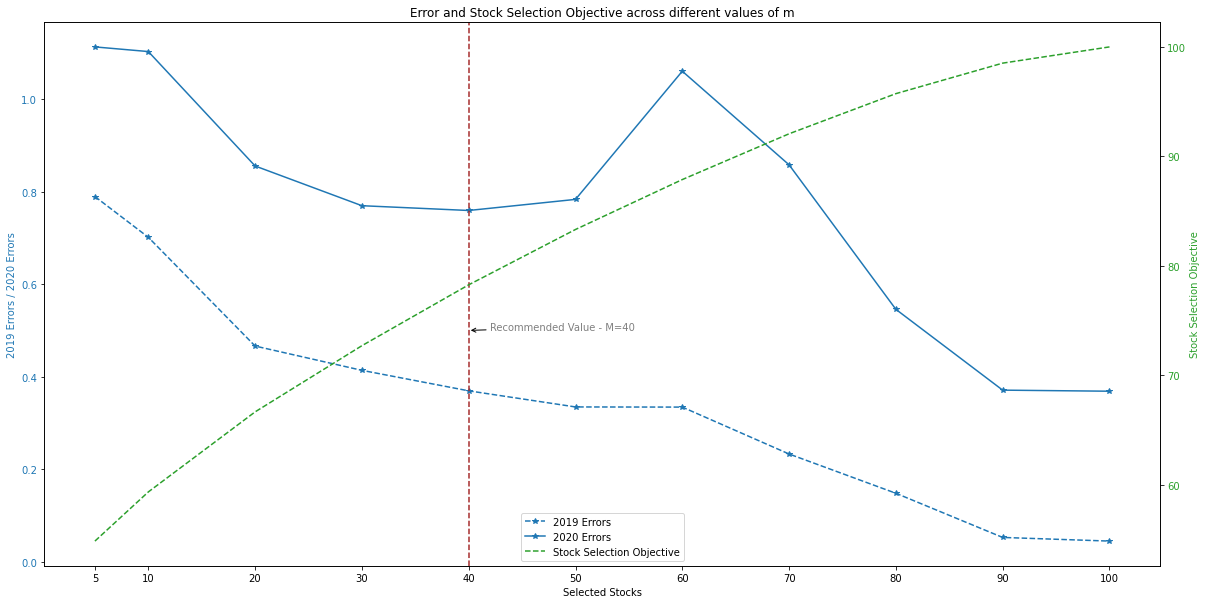

In [649]:
import matplotlib.pyplot as plt

# Create a figure and axis with increased figure size
fig, ax1 = plt.subplots(figsize=(20, 10))

# Plot the 2019 and 2020 errors on the primary y-axis with markers
ax1.set_xlabel('Selected Stocks')
ax1.set_ylabel('2019 Errors / 2020 Errors', color='tab:blue')
ax1.plot(simple_error_df['2019_errors'], label='2019 Errors', color='tab:blue', marker='*', linestyle='--')
ax1.plot(simple_error_df['2020_errors'], label='2020 Errors', color='tab:blue', marker='*')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a secondary y-axis for the selection objective as a dotted line
ax2 = ax1.twinx()

# Plot the stock selection objective on the secondary y-axis as a dotted line
ax2.set_ylabel('Stock Selection Objective', color='tab:green')
ax2.plot( simple_error_df['stock_selection_objective'], label='Stock Selection Objective', color='tab:green', linestyle='--')
ax2.tick_params(axis='y', labelcolor='tab:green')

# Add a legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc="lower center")

# Set the x-axis labels
plt.xticks(simple_error_df.index)

# Add a dotted line at x=40 and label
ax1.axvline(x=40, color='brown', linestyle='--', label='Recommended Value - M=40')
ax1.annotate('Recommended Value - M=40', xy=(40, 0.5), xytext=(42, 0.5), color='gray', arrowprops=dict(arrowstyle='->'))


# Show the plot
plt.title('Error and Stock Selection Objective across different values of m')
plt.show()


As the value of m increases, the training error keeps going down but the testing error reduces till m=40 and then it starts to increase. 
**M= 40 would be the ideal value**

### The second approach

In [579]:
returns_2019.head()

,NDX,ATVI,ADBE,AMD,ALXN,ALGN,GOOGL,GOOG,AMZN,AMGN,ADI,ANSS,AAPL,AMAT,ASML,ADSK,ADP,BIDU,BIIB,BMRN,BKNG,AVGO,CDNS,CDW,CERN,CHTR,CHKP,CTAS,CSCO,CTXS,CTSH,CMCSA,CPRT,COST,CSX,DXCM,DOCU,DLTR,EBAY,EA,EXC,EXPE,FB,FAST,FISV,GILD,IDXX,ILMN,INCY,INTC,INTU,ISRG,JD,KLAC,KHC,LRCX,LBTYA,LBTYK,LULU,MAR,MXIM,MELI,MCHP,MU,MSFT,MRNA,MDLZ,MNST,NTES,NFLX,NVDA,NXPI,ORLY,PCAR,PAYX,PYPL,PEP,PDD,QCOM,REGN,ROST,SGEN,SIRI,SWKS,SPLK,SBUX,SNPS,TMUS,TTWO,TSLA,TXN,TCOM,ULTA,VRSN,VRSK,VRTX,WBA,WDAY,WDC,XEL,XLNX
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,-0.033602,-0.035509,-0.039498,-0.094530,0.022030,-0.085791,-0.027696,-0.028484,-0.025242,-0.015216,-0.060405,-0.037550,-0.099607,-0.057945,-0.055150,-0.055133,-0.030198,-0.046471,0.007581,-0.008945,-0.034024,-0.088951,-0.039325,-0.025767,-0.022556,-0.001701,-0.011111,-0.016001,-0.036368,-0.014382,-0.031542,0.007856,-0.016569,-0.021196,-0.015658,-0.025352,-0.048751,-0.004825,-0.018371,-0.020655,0.001135,-0.030898,-0.029039,-0.028399,-0.029082,0.028531,-0.024334,-0.034904,0.070799,-0.055013,-0.030596,-0.033882,-0.043253,-0.056099,-0.000692,-0.048229,0.001404,-0.006280,0.008188,-0.053229,-0.056845,-0.004765,-0.070498,-0.053435,-0.036788,0.011089,-0.003760,-0.015587,-0.038478,0.013226,-0.060417,-0.040783,0.014598,-0.023159,-0.016905,-0.042682,-0.009334,-0.031067,-0.029617,-0.000967,-0.008355,-0.019482,0.006780,-0.106533,-0.024293,-0.043377,-0.034979,-0.003678,-0.046726,-0.031472,-0.058973,-0.022834,-0.018591,-0.034989,-0.030557,-0.002133,-0.010435,-0.035808,-0.068217,-0.003940,-0.037651
2,0.044824,0.039903,0.048632,0.114370,0.057779,0.010445,0.051294,0.053786,0.050064,0.034184,0.024278,0.043737,0.042689,0.068484,0.043269,0.052770,0.039854,0.040333,0.036905,0.034442,0.032728,0.009828,0.041657,0.009724,0.030178,0.053009,0.029311,0.047024,0.045045,0.018860,0.042553,0.033776,0.035615,0.029039,0.029682,0.035453,0.053309,0.023468,0.022952,0.072545,0.011333,0.042112,0.047138,0.041041,0.044359,0.045977,0.052859,0.064910,0.061857,0.061362,0.039677,0.047619,0.094349,0.063978,0.027246,0.048849,0.064516,0.068546,0.033693,0.059662,0.044004,0.063185,0.040561,0.054839,0.046509,0.094193,0.027680,0.037292,0.040064,0.097234,0.064068,0.048353,-0.012452,0.044409,0.034860,0.050920,0.020506,0.054368,0.016158,0.068453,0.027203,0.056236,0.038720,0.047925,0.071719,0.033155,0.034398,0.037988,0.025719,0.057697,0.045230,0.058976,0.047954,0.044744,0.044147,0.054785,0.033269,0.060577,0.042356,0.009786,0.046303
3,0.010211,0.028196,0.013573,0.082632,0.018302,0.017192,-0.001994,-0.002167,0.034353,0.013457,0.006288,0.025477,-0.002226,0.017804,0.022847,0.034612,-0.005410,0.010252,0.012785,0.035477,-0.003336,0.020366,0.003699,-0.003980,-0.005744,-0.004195,-0.004556,0.001681,0.006757,0.003995,-0.001570,-0.010611,0.005560,0.003685,-0.005415,0.117946,0.019315,0.054581,0.017259,0.037550,0.001793,0.012998,0.000725,0.007308,-0.002049,0.004542,-0.002881,0.017179,0.026844,0.004659,0.015255,0.014332,0.022003,0.014239,0.018881,0.008909,-0.047870,-0.042766,0.043174,0.001855,0.010388,0.043161,0.029271,0.039755,0.001275,-0.040684,0.006856,-0.001205,0.042394,0.059717,0.052941,0.007422,-0.006231,-0.001186,-0

In [228]:
m_array = [5,10,20,30,40,50,60,70,80,90,100] 
T = 60
M=2
stock_weight_dictionary_complex = {}
selected_stock_dictionary_complex = {}

for m in m_array:
    
    if n>=m:
        complex_model = gp.Model()
        select_stock = complex_model.addMVar(n, vtype='B')
        stock_weight = complex_model.addMVar(n)
        index_difference = complex_model.addMVar(days_2019)

        selection_const_complex = complex_model.addConstr(gp.quicksum(select_stock[i] for i in range(n)) == m)

        portfolio_weights_const_complex = complex_model.addConstr(gp.quicksum(stock_weight[i] for i in range(n)) == 1)

        mod_const_1_complex = complex_model.addConstrs(
            (gp.quicksum(stock_weight[i] * returns_2019.iloc[j, i + 1] for i in range(n)) - index_2019[j]) <= index_difference[j]
            for j in range(days_2019)
        )

        mod_const_2 = complex_model.addConstrs(
            (-1 * gp.quicksum(stock_weight[i] * returns_2019.iloc[j, i + 1] for i in range(n)) + index_2019[j]) <= index_difference[j]
            for j in range(days_2019)
        )

        big_m_const = complex_model.addConstrs(stock_weight[i]<=select_stock[i]*M for i in range(n))

        complex_model.setObjective(gp.quicksum(index_difference[i] for i in range(days_2019)), sense = gp.GRB.MINIMIZE)
        complex_model.setParam(gp.GRB.Param.TimeLimit, T)
        complex_model.optimize()
        selected_stock_dictionary_complex[m] = select_stock.x
        stock_weight_dictionary_complex[m] = stock_weight.x
    


Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Set parameter TimeLimit to value 3600
Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (win64)

CPU model: Intel(R) Core(TM) i7-10750H CPU @ 2.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Academic license - for non-commercial use only - registered to mayday99@utexas.edu
Optimize a model with 604 rows, 451 columns and 50710 nonzeros
Model fingerprint: 0x7aad7cea
Variable types: 351 continuous, 100 integer (100 binary)
Coefficient statistics:
  Matrix range     [2e-05, 2e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e-05, 5e+00]
Found heuristic solution: objective 2.5341372
Presolve removed 2 rows and 1 columns
Presolve time: 0.03s
Presolved: 602 rows, 450 columns, 50708 nonzeros
Variable types: 350 continuous, 100 integer (100 binary)

Root relaxation: objective 4.491082e-02, 1488 iterations

 152215 74927    0.43051   52   45    0.49926    0.30432  39.0%   112  390s
 155394 76024    0.34281   45   50    0.49926    0.30559  38.8%   112  395s
 158323 77489    0.41705   57   40    0.49926    0.30639  38.6%   111  400s
 161224 78586    0.37107   43   48    0.49926    0.30734  38.4%   111  405s
 164307 79879    0.36359   42   49    0.49926    0.30819  38.3%   111  410s
 167357 81171    0.34371   34   49    0.49926    0.30902  38.1%   111  415s
 170104 82121     cutoff   36         0.49926    0.31016  37.9%   111  420s
 172892 83142    0.38841   47   50    0.49926    0.31095  37.7%   110  425s
 175263 83881    0.40122   47   44    0.49926    0.31176  37.6%   110  430s
 178948 85530    0.36563   47   38    0.49926    0.31264  37.4%   110  435s
 182098 86902    0.44209   64   39    0.49926    0.31360  37.2%   110  440s
 184534 88005    0.32958   46   50    0.49926    0.31437  37.0%   110  445s
 187697 88960    0.35138   48   46    0.49926    0.31513  36.9%   110  450s
 191264 9035

 482518 183688    0.44949   48   43    0.49926    0.36869  26.2%  98.5  930s
 485585 184592     cutoff   57         0.49926    0.36908  26.1%  98.5  935s
 489377 185672    0.39816   40   48    0.49926    0.36953  26.0%  98.4  940s
 492502 186216     cutoff   36         0.49926    0.37002  25.9%  98.3  945s
 496056 186947     cutoff   53         0.49926    0.37047  25.8%  98.2  950s
 499804 187910    0.39676   44   48    0.49926    0.37098  25.7%  98.1  955s
 502915 188482     cutoff   38         0.49926    0.37143  25.6%  98.0  960s
 506508 189237    0.39171   55   39    0.49926    0.37186  25.5%  97.9  965s
 509595 189803    0.39871   51   42    0.49926    0.37222  25.4%  97.8  970s
 513334 190791    0.42664   60   35    0.49926    0.37272  25.3%  97.7  975s
 516366 191646    0.48292   58   36    0.49926    0.37309  25.3%  97.7  980s
 517527 191893    0.48038   60   38    0.49926    0.37319  25.3%  97.6  985s
 520743 192425     cutoff   57         0.49926    0.37356  25.2%  97.5  990s

 849779 246205    0.46768   74   30    0.49926    0.40627  18.6%  90.4 1475s
 853912 246671     cutoff   41         0.49926    0.40657  18.6%  90.3 1480s
 857783 246760    0.42130   45   44    0.49926    0.40694  18.5%  90.2 1485s
 861372 247224    0.42640   48   47    0.49926    0.40724  18.4%  90.1 1490s
 865350 247620    0.41433   48   45    0.49926    0.40755  18.4%  90.1 1495s
 869265 248107     cutoff   58         0.49926    0.40785  18.3%  90.0 1500s
 873326 248274    0.44016   43   44    0.49926    0.40821  18.2%  89.9 1505s
 877436 248692    0.43357   59   35    0.49926    0.40854  18.2%  89.8 1510s
 881322 249245     cutoff   47         0.49926    0.40884  18.1%  89.8 1515s
 885132 249474    0.45359   45   37    0.49926    0.40918  18.0%  89.7 1520s
 888631 249895     cutoff   43         0.49926    0.40941  18.0%  89.6 1525s
 892314 250315     cutoff   57         0.49926    0.40971  17.9%  89.6 1530s
 895748 250673    0.41062   46   43    0.49926    0.40999  17.9%  89.5 1535s

 1248289 256828     cutoff   51         0.49926    0.43516  12.8%  83.6 2006s
 1252689 256596     cutoff   58         0.49926    0.43545  12.8%  83.5 2010s
 1256775 256433    0.47800   49   41    0.49926    0.43571  12.7%  83.4 2015s
 1260636 256010    0.46758   48   41    0.49926    0.43595  12.7%  83.4 2020s
 1265449 255444     cutoff   64         0.49926    0.43633  12.6%  83.3 2025s
 1269030 255147    0.44215   50   43    0.49926    0.43655  12.6%  83.2 2030s
 1273467 254762     cutoff   60         0.49926    0.43685  12.5%  83.2 2035s
 1277425 254582    0.44934   51   46    0.49926    0.43712  12.4%  83.1 2040s
 1281901 254355     cutoff   54         0.49926    0.43737  12.4%  83.0 2045s
 1286384 254083     cutoff   58         0.49926    0.43764  12.3%  83.0 2050s
 1290109 253955    0.44828   48   46    0.49926    0.43787  12.3%  82.9 2055s
 1293837 253625    0.48184   58   40    0.49926    0.43811  12.2%  82.9 2060s
 1298471 253191    0.44502   62   39    0.49926    0.43842  12.2

 1702482 173464 infeasible   54         0.49926    0.46307  7.25%  76.2 2535s
 1707881 171613    0.49137   62   35    0.49926    0.46344  7.18%  76.1 2540s
 1712011 170317    0.48264   58   38    0.49926    0.46367  7.13%  76.1 2545s
 1717089 168868     cutoff   58         0.49926    0.46395  7.07%  76.0 2550s
 1721202 167354     cutoff   63         0.49926    0.46421  7.02%  75.9 2555s
 1726322 165722     cutoff   51         0.49926    0.46453  6.96%  75.8 2560s
 1731435 164125    0.48548   50   35    0.49926    0.46482  6.90%  75.7 2565s
 1736374 162413     cutoff   61         0.49926    0.46512  6.84%  75.7 2570s
 1740680 160832     cutoff   57         0.49926    0.46538  6.79%  75.6 2575s
 1745854 159097    0.48807   69   36    0.49926    0.46568  6.73%  75.5 2580s
 1750979 157346     cutoff   51         0.49926    0.46598  6.67%  75.4 2585s
 1755403 155688    0.47115   56   41    0.49926    0.46626  6.61%  75.3 2590s
 1760473 153798     cutoff   51         0.49926    0.46658  6.55

     0     0    0.04491    0   79    0.77080    0.04491  94.2%     -    2s
H    0     0                       0.7480313    0.04491  94.0%     -    2s
     0     0    0.04491    0   79    0.74803    0.04491  94.0%     -    2s
H    0     0                       0.6154677    0.04491  92.7%     -    2s
     0     0    0.04493    0   79    0.61547    0.04493  92.7%     -    2s
     0     0    0.04493    0   79    0.61547    0.04493  92.7%     -    2s
     0     0    0.04493    0   80    0.61547    0.04493  92.7%     -    2s
     0     0    0.04493    0   80    0.61547    0.04493  92.7%     -    3s
     0     0    0.04495    0   79    0.61547    0.04495  92.7%     -    4s
     0     2    0.04495    0   79    0.61547    0.04495  92.7%     -    4s
    58    66    0.04515   12   75    0.61547    0.04495  92.7%  17.8    5s
H  481   318                       0.5091613    0.04495  91.2%  86.1    8s
H  484   318                       0.4450801    0.04495  89.9%  85.8    8s
H  694   464             

 162377 93888    0.14893   42   58    0.30150    0.09393  68.8%   112  505s
 164830 95490    0.24116   60   37    0.30150    0.09443  68.7%   112  510s
 166777 96533    0.18474   52   46    0.30150    0.09474  68.6%   111  515s
 169293 97966    0.12707   42   58    0.30150    0.09524  68.4%   111  521s
 171195 99197    0.29929   77   26    0.30150    0.09554  68.3%   111  525s
 173750 100819    0.19392   28   53    0.30150    0.09598  68.2%   111  530s
 175675 101734    0.18979   42   48    0.30150    0.09614  68.1%   111  536s
 176962 102849    0.19866   56   43    0.30150    0.09640  68.0%   111  540s
 178720 104046    0.16856   41   51    0.30150    0.09681  67.9%   111  545s
 181167 105403    0.09813   34   60    0.30150    0.09704  67.8%   111  551s
 182982 106305    0.09832   33   67    0.30150    0.09726  67.7%   111  555s
 185486 107576    0.26546   66   34    0.30150    0.09751  67.7%   111  560s
 187833 108973    0.14337   43   53    0.30150    0.09782  67.6%   111  566s
 189

 391549 220963    0.17453   38   57    0.30150    0.11402  62.2%   108 1046s
 392870 221746    0.25752   66   35    0.30150    0.11408  62.2%   108 1050s
 395405 222970    0.22323   46   48    0.30150    0.11419  62.1%   108 1055s
 397922 224169    0.20121   56   41    0.30150    0.11428  62.1%   108 1061s
 399824 225262    0.16632   43   54    0.30150    0.11439  62.1%   108 1065s
 402334 226776    0.13138   37   60    0.30150    0.11453  62.0%   108 1070s
 404711 228164    0.22361   47   44    0.30150    0.11466  62.0%   108 1075s
 407043 229602    0.12337   40   56    0.30150    0.11479  61.9%   108 1080s
 408778 230481    0.13377   42   57    0.30150    0.11486  61.9%   108 1085s
 411272 231658    0.16945   37   55    0.30150    0.11492  61.9%   108 1090s
 413744 233023    0.14598   46   53    0.30150    0.11502  61.8%   108 1095s
 416115 234580    0.28446   61   32    0.30150    0.11512  61.8%   108 1100s
 418473 236109    0.29563   77   29    0.30150    0.11523  61.8%   107 1105s

 632286 350383     cutoff   33         0.30150    0.12356  59.0%   105 1585s
 634555 351813    0.24988   62   39    0.30150    0.12361  59.0%   105 1590s
 636917 353081    0.27174   62   37    0.30150    0.12367  59.0%   105 1595s
 639250 354487    0.22976   64   36    0.30150    0.12374  59.0%   105 1600s
 641721 355593    0.19539   53   45    0.30150    0.12385  58.9%   105 1605s
 644164 357006    0.25259   61   36    0.30150    0.12394  58.9%   105 1610s
 646540 358439     cutoff   73         0.30150    0.12400  58.9%   105 1616s
 649025 359365     cutoff   72         0.30150    0.12409  58.8%   105 1621s
 651498 360769     cutoff   77         0.30150    0.12416  58.8%   105 1626s
 653476 361651     cutoff   55         0.30150    0.12422  58.8%   105 1630s
 656439 363171     cutoff   36         0.30150    0.12434  58.8%   105 1636s
 658847 364617    0.26190   60   37    0.30150    0.12442  58.7%   105 1641s
 661258 365763    0.25712   57   37    0.30150    0.12448  58.7%   105 1646s

 889034 487019    0.16649   41   54    0.30150    0.13040  56.7%   103 2135s
 891275 488346     cutoff   39         0.30150    0.13045  56.7%   103 2140s
 893597 489392     cutoff   39         0.30150    0.13051  56.7%   103 2145s
 896061 490606    0.21361   54   42    0.30150    0.13056  56.7%   103 2150s
 898581 491945    0.23302   55   43    0.30150    0.13064  56.7%   103 2155s
 900949 493387    0.14733   38   55    0.30150    0.13068  56.7%   103 2160s
 903934 495307    0.26494   58   36    0.30150    0.13075  56.6%   103 2165s
 906489 496955    0.14058   43   49    0.30150    0.13080  56.6%   103 2170s
 908941 498234    0.15814   28   60    0.30150    0.13084  56.6%   103 2175s
 911401 499563    0.13436   40   60    0.30150    0.13089  56.6%   103 2180s
 914057 501026    0.22122   61   38    0.30150    0.13093  56.6%   103 2185s
 916484 502471    0.15923   50   49    0.30150    0.13097  56.6%   103 2190s
 918955 503608    0.15925   45   51    0.30150    0.13103  56.5%   103 2196s

 1143755 621166    0.23549   57   42    0.30150    0.13531  55.1%   101 2670s
 1146316 622500    0.29081   75   26    0.30150    0.13535  55.1%   101 2675s
 1148728 623778     cutoff   38         0.30150    0.13540  55.1%   101 2680s
 1151151 625091     cutoff   43         0.30150    0.13543  55.1%   101 2685s
 1153704 626333    0.16031   45   51    0.30150    0.13548  55.1%   101 2690s
 1156387 627897    0.21636   48   49    0.30150    0.13552  55.1%   101 2695s
 1158778 629374    0.19308   42   44    0.30150    0.13556  55.0%   101 2700s
 1161290 630409    0.26506   64   30    0.30150    0.13560  55.0%   101 2705s
 1162611 631242    0.13572   40   54    0.30150    0.13562  55.0%   101 2710s
 1165222 632820    0.14740   36   55    0.30150    0.13566  55.0%   101 2715s
 1167622 634173    0.29846   73   33    0.30150    0.13569  55.0%   101 2720s
 1170047 635418     cutoff   42         0.30150    0.13573  55.0%   101 2725s
 1172560 636742    0.24004   43   45    0.30150    0.13576  55.0

 1406651 760316     cutoff   63         0.30150    0.13938  53.8%   100 3210s
 1409358 761174    0.23021   65   35    0.30150    0.13940  53.8%   100 3216s
 1410788 762133    0.16255   37   55    0.30150    0.13942  53.8%   100 3220s
 1413440 763515    0.15900   38   55    0.30150    0.13945  53.7%   100 3225s
 1415920 764830     cutoff   35         0.30150    0.13950  53.7%   100 3230s
 1419032 766489    0.13962   43   58    0.30150    0.13955  53.7%   100 3235s
 1421571 767932    0.21012   55   40    0.30150    0.13960  53.7%   100 3240s
 1424048 769257    0.16695   52   49    0.30150    0.13962  53.7%   100 3245s
 1427171 771053    0.17549   43   54    0.30150    0.13967  53.7%   100 3251s
 1429686 772528    0.13977   32   58    0.30150    0.13971  53.7%   100 3256s
 1431469 773332    0.19418   53   46    0.30150    0.13972  53.7%   100 3260s
 1434769 774965     cutoff   42         0.30150    0.13975  53.6%   100 3265s
 1437192 776040    0.16663   44   51    0.30150    0.13979  53.6

     0     0    0.04491    0   69    0.34043    0.04491  86.8%     -    4s
     0     2    0.04491    0   69    0.34043    0.04491  86.8%     -    4s
    25    32    0.04526    6   65    0.34043    0.04491  86.8%  93.7    5s
H   66    80                       0.3204779    0.04491  86.0%  37.4    5s
H  117   118                       0.3204766    0.04491  86.0%  24.1    5s
H  187   154                       0.3204763    0.04491  86.0%  86.3    5s
H  188   154                       0.3204745    0.04491  86.0%  86.7    5s
*  439   231              29       0.3152153    0.04491  85.8%   127    6s
H  475   256                       0.2834551    0.04491  84.2%   131    8s
   503   289    0.27458   25   43    0.28346    0.04491  84.2%   134   10s
H  976   507                       0.2608643    0.04491  82.8%   116   13s
H  979   465                       0.2468614    0.04491  81.8%   116   13s
H  982   432                       0.2346254    0.04491  80.9%   116   15s
  1278   577    0.04524  

 135170 79351    0.07637   44   60    0.16293    0.04935  69.7%   126  521s
 136173 79662    0.07635   40   55    0.16293    0.04939  69.7%   126  525s
 137985 80449    0.15757   84   26    0.16293    0.04942  69.7%   127  531s
 140191 81754    0.13196   74   34    0.16293    0.04944  69.7%   127  536s
 141543 82611    0.08293   45   61    0.16293    0.04949  69.6%   127  540s
 143477 83896    0.09842   47   55    0.16293    0.04953  69.6%   127  545s
 145980 85659    0.11164   54   52    0.16293    0.04957  69.6%   127  551s
 146814 86209     cutoff   72         0.16293    0.04959  69.6%   127  555s
 148712 87207    0.06462   42   63    0.16293    0.04961  69.5%   127  560s
 151270 88457    0.16064   72   32    0.16293    0.04964  69.5%   127  566s
 153040 89603     cutoff   51         0.16293    0.04966  69.5%   127  571s
 154924 90611    0.07526   46   56    0.16293    0.04970  69.5%   127  576s
 156639 91814    0.13194   51   47    0.16293    0.04973  69.5%   127  581s
 158527 9264

 327226 193152    0.12521   70   39    0.16243    0.05181  68.1%   129 1066s
 329169 194279     cutoff   62         0.16243    0.05182  68.1%   129 1071s
 331059 195606    0.14499   75   32    0.16243    0.05183  68.1%   129 1075s
 333011 196399    0.13542   55   47    0.16243    0.05186  68.1%   129 1080s
 334807 197305    0.05188   38   63    0.16243    0.05188  68.1%   129 1085s
 337118 198616    0.09679   50   52    0.16243    0.05190  68.0%   129 1091s
 338979 199537    0.13308   70   37    0.16243    0.05192  68.0%   129 1095s
 340735 200505    0.08322   44   54    0.16243    0.05193  68.0%   129 1100s
 342966 201853     cutoff   59         0.16243    0.05196  68.0%   129 1106s
 344790 203084    0.06591   42   56    0.16243    0.05197  68.0%   129 1111s
 346671 204196    0.08545   45   55    0.16243    0.05199  68.0%   129 1116s
 348463 205385    0.09914   53   50    0.16243    0.05200  68.0%   129 1121s
 350284 206620    0.07053   36   63    0.16243    0.05202  68.0%   129 1125s

 534535 314878    0.09388   46   53    0.16243    0.05336  67.2%   129 1600s
 536369 315863    0.15216   70   34    0.16243    0.05338  67.1%   129 1605s
 537617 316236    0.13974   82   28    0.16243    0.05338  67.1%   129 1615s
 538331 317221    0.12069   55   48    0.16243    0.05339  67.1%   129 1621s
 540313 318371    0.12340   62   41    0.16243    0.05340  67.1%   129 1626s
 542311 319590    0.12253   69   37    0.16243    0.05341  67.1%   129 1631s
 544223 320866     cutoff   46         0.16243    0.05342  67.1%   129 1636s
 546052 321999     cutoff   57         0.16243    0.05344  67.1%   129 1641s
 548000 323184    0.12472   64   39    0.16243    0.05345  67.1%   129 1645s
 550015 323935    0.08676   40   55    0.16243    0.05347  67.1%   129 1650s
 551615 324962    0.08371   45   54    0.16243    0.05347  67.1%   129 1655s
 553832 326214    0.14127   77   29    0.16243    0.05348  67.1%   129 1661s
 555624 327068    0.06157   42   60    0.16243    0.05350  67.1%   129 1665s

 733248 429221     cutoff   41         0.16243    0.05445  66.5%   129 2151s
 735074 430239    0.16238   75   33    0.16243    0.05445  66.5%   129 2155s
 736929 431431    0.14292   55   42    0.16243    0.05446  66.5%   129 2160s
 737556 431436    0.07313   46   58    0.16243    0.05446  66.5%   129 2169s
 737563 431783    0.07867   47   54    0.16243    0.05446  66.5%   129 2171s
 739352 432848    0.11115   55   45    0.16243    0.05448  66.5%   129 2175s
 741231 434041    0.08331   44   56    0.16243    0.05449  66.5%   129 2180s
 743207 435179     cutoff   74         0.16243    0.05449  66.5%   129 2185s
 745462 436710    0.10655   57   44    0.16243    0.05451  66.4%   129 2191s
 747292 437969    0.06259   43   55    0.16243    0.05452  66.4%   129 2196s
 749114 439031    0.06195   44   60    0.16243    0.05453  66.4%   129 2201s
 751175 439927     cutoff   70         0.16243    0.05454  66.4%   129 2205s
 753030 441118    0.11336   61   45    0.16243    0.05454  66.4%   129 2210s

 929636 543603    0.08434   51   56    0.16243    0.05527  66.0%   129 2695s
 931669 544373    0.12240   55   45    0.16243    0.05528  66.0%   129 2700s
 934177 545554    0.13238   53   47    0.16243    0.05529  66.0%   129 2706s
 935988 546395    0.09746   45   56    0.16243    0.05529  66.0%   129 2710s
 937758 547384    0.08333   46   55    0.16243    0.05531  66.0%   129 2715s
 939651 548329     cutoff   45         0.16243    0.05532  65.9%   129 2720s
 941917 549828    0.13864   47   50    0.16243    0.05533  65.9%   129 2726s
 943664 550808    0.05539   41   63    0.16243    0.05534  65.9%   129 2730s
 945554 551978    0.11529   64   41    0.16243    0.05534  65.9%   129 2735s
 947311 553240    0.09270   48   53    0.16243    0.05535  65.9%   129 2740s
 949706 554829    0.11101   54   49    0.16243    0.05536  65.9%   129 2745s
 951559 555917    0.06073   38   62    0.16243    0.05536  65.9%   129 2750s
 953249 556659    0.15969   79   27    0.16243    0.05537  65.9%   129 2755s

 1129419 658606    0.09000   46   50    0.16243    0.05602  65.5%   128 3241s
 1131288 659665    0.07545   44   59    0.16243    0.05603  65.5%   128 3245s
 1133093 660573    0.08030   47   58    0.16243    0.05603  65.5%   128 3250s
 1134672 661735    0.08854   51   51    0.16243    0.05604  65.5%   128 3256s
 1135981 662321    0.10467   57   43    0.16243    0.05604  65.5%   128 3260s
 1137694 663549    0.10165   55   52    0.16243    0.05605  65.5%   128 3266s
 1139745 664379    0.08378   45   52    0.16243    0.05605  65.5%   128 3270s
 1142039 665406    0.07415   43   57    0.16243    0.05606  65.5%   128 3276s
 1143762 666373     cutoff   59         0.16243    0.05606  65.5%   128 3280s
 1145622 667026    0.08904   46   55    0.16243    0.05607  65.5%   128 3285s
 1148012 668318    0.12922   66   40    0.16243    0.05608  65.5%   128 3291s
 1149802 669276    0.12121   66   40    0.16243    0.05608  65.5%   128 3295s
 1151083 670147    0.10614   50   52    0.16243    0.05609  65.5

H  392   273                       0.2487826    0.04491  81.9%  80.1    6s
H  403   273                       0.2359214    0.04491  81.0%  79.9    6s
H  476   301                       0.2172141    0.04491  79.3%  88.7    9s
H  479   301                       0.2112770    0.04491  78.7%  89.8    9s
   613   451    0.18910   53   32    0.21128    0.04491  78.7%  90.5   10s
H  758   540                       0.2037458    0.04491  78.0%  79.0   11s
H  760   540                       0.2025345    0.04491  77.8%  79.1   11s
  1281   924    0.16869   34   59    0.20253    0.04491  77.8%  86.1   16s
  1284   926    0.12092   15   59    0.20253    0.04491  77.8%  85.9   20s
  1290   930    0.14057   41   59    0.20253    0.04491  77.8%  85.5   25s
  1309   950    0.05596   19   56    0.20253    0.04501  77.8%  87.4   30s
H 1358   936                       0.1900324    0.04501  76.3%  89.3   30s
H 1449   951                       0.1750769    0.04501  74.3%  90.2   31s
H 1508   948             

 136927 80451    0.10419   66   37    0.11075    0.04783  56.8%  82.4  490s
 137542 80832    0.05232   42   57    0.11075    0.04783  56.8%  82.5  495s
 139957 82281     cutoff   57         0.11075    0.04785  56.8%  82.5  500s
 142426 83851    0.08991   61   47    0.11075    0.04788  56.8%  82.5  506s
 144230 84967    0.07393   59   44    0.11075    0.04789  56.8%  82.6  510s
 146754 86440    0.08179   63   35    0.11075    0.04789  56.8%  82.5  516s
 148360 87578     cutoff   52         0.11075    0.04791  56.7%  82.5  520s
 150843 89101    0.09911   75   29    0.11075    0.04792  56.7%  82.5  525s
 153228 90445     cutoff   62         0.11075    0.04792  56.7%  82.5  531s
 155082 91559     cutoff   79         0.11075    0.04795  56.7%  82.5  535s
 157491 93152    0.08295   61   44    0.11075    0.04795  56.7%  82.6  541s
 158043 93245     cutoff   73         0.11075    0.04798  56.7%  82.6  551s
 159578 94542    0.07325   59   45    0.11075    0.04799  56.7%  82.6  556s
 161659 9596

 369141 223696     cutoff   63         0.11075    0.04908  55.7%  83.2 1030s
 371087 224931    0.10139   78   28    0.11075    0.04909  55.7%  83.2 1035s
 373440 226395    0.05362   48   55    0.11075    0.04909  55.7%  83.2 1040s
 375973 227996    0.05921   55   47    0.11075    0.04909  55.7%  83.2 1045s
 378451 229670    0.05749   50   53    0.11075    0.04910  55.7%  83.1 1050s
 380928 231319    0.09799   53   45    0.11075    0.04911  55.7%  83.1 1055s
 383338 232852    0.07404   44   47    0.11075    0.04911  55.7%  83.1 1060s
 385627 233704    0.04916   37   56    0.11075    0.04913  55.6%  83.2 1066s
 387636 235152    0.06910   48   53    0.11075    0.04913  55.6%  83.2 1071s
 389726 236512    0.07700   59   41    0.11075    0.04914  55.6%  83.2 1075s
 392460 238216    0.06333   52   50    0.11075    0.04914  55.6%  83.2 1080s
 394983 239790    0.06081   52   54    0.11075    0.04915  55.6%  83.2 1086s
 396350 240717    0.10365   81   28    0.11075    0.04915  55.6%  83.2 1091s

 604372 367298    0.06362   38   55    0.11075    0.04964  55.2%  82.8 1590s
 606884 368720    0.08247   51   48    0.11075    0.04964  55.2%  82.8 1595s
 609355 370330    0.07582   63   41    0.11075    0.04965  55.2%  82.8 1600s
 611719 371598    0.08283   63   39    0.11075    0.04965  55.2%  82.8 1606s
 612301 371990    0.10293   77   28    0.11075    0.04965  55.2%  82.8 1610s
 614684 373541     cutoff   51         0.11075    0.04966  55.2%  82.9 1616s
 616753 374827    0.05606   51   54    0.11075    0.04966  55.2%  82.8 1620s
 619059 376097     cutoff   65         0.11075    0.04967  55.2%  82.9 1625s
 621706 377772     cutoff   51         0.11075    0.04967  55.1%  82.8 1631s
 623649 378998    0.10873   65   38    0.11075    0.04967  55.1%  82.8 1635s
 626061 380623    0.08104   54   48    0.11075    0.04968  55.1%  82.8 1640s
 627970 381656    0.10163   52   39    0.11075    0.04969  55.1%  82.8 1645s
 630449 382954    0.05717   48   54    0.11075    0.04969  55.1%  82.8 1650s

 837443 509050    0.07486   51   44    0.11075    0.05009  54.8%  82.6 2140s
 839807 510407    0.07528   58   44    0.11075    0.05009  54.8%  82.6 2146s
 841602 511282    0.06091   47   50    0.11075    0.05010  54.8%  82.6 2150s
 843982 512795    0.05369   52   54    0.11075    0.05010  54.8%  82.6 2155s
 845860 513992     cutoff   77         0.11075    0.05010  54.8%  82.6 2160s
 848444 515433    0.07475   55   46    0.11075    0.05011  54.8%  82.6 2165s
 850348 516600    0.07247   59   44    0.11075    0.05012  54.7%  82.6 2170s
 852882 518232     cutoff   75         0.11075    0.05013  54.7%  82.6 2175s
 854758 519532    0.09959   74   31    0.11075    0.05014  54.7%  82.6 2180s
 856051 520346    0.07742   45   47    0.11075    0.05014  54.7%  82.6 2186s
 857963 521614    0.09986   55   40    0.11075    0.05014  54.7%  82.6 2190s
 860445 523233    0.11046   77   27    0.11075    0.05014  54.7%  82.6 2195s
 862190 523899    0.05015   49   58    0.11075    0.05015  54.7%  82.6 2208s

 1064565 645144    0.06157   49   53    0.11075    0.05047  54.4%  82.8 2690s
 1066513 646190     cutoff   88         0.11075    0.05047  54.4%  82.8 2695s
 1069066 647611    0.10972   53   46    0.11075    0.05047  54.4%  82.9 2701s
 1070803 648581    0.07641   57   44    0.11075    0.05048  54.4%  82.9 2705s
 1073478 650266    0.09430   71   33    0.11075    0.05048  54.4%  82.9 2710s
 1075380 651481    0.05049   43   58    0.11075    0.05049  54.4%  82.9 2715s
 1077805 652964    0.06748   56   45    0.11075    0.05049  54.4%  82.9 2720s
 1079057 653371    0.06772   56   51    0.11075    0.05049  54.4%  82.9 2732s
 1079582 654083     cutoff   82         0.11075    0.05049  54.4%  82.9 2735s
 1081998 655465    0.07554   60   45    0.11075    0.05050  54.4%  82.9 2741s
 1084013 656737    0.07442   50   50    0.11075    0.05050  54.4%  82.9 2745s
 1086014 658093    0.09974   76   29    0.11075    0.05050  54.4%  82.9 2750s
 1088814 659797    0.08677   60   39    0.11075    0.05051  54.4

 1290051 779743    0.09703   69   35    0.11075    0.05075  54.2%  83.0 3240s
 1291761 780855    0.06068   51   50    0.11075    0.05075  54.2%  83.0 3246s
 1293034 781627    0.06785   53   49    0.11075    0.05075  54.2%  83.0 3250s
 1294934 782648     cutoff   82         0.11075    0.05075  54.2%  83.0 3255s
 1297415 784326    0.06259   49   49    0.11075    0.05075  54.2%  83.0 3260s
 1299339 785555    0.08878   63   40    0.11075    0.05076  54.2%  83.0 3265s
 1302006 787164     cutoff   58         0.11075    0.05076  54.2%  83.0 3271s
 1303924 788296     cutoff   69         0.11075    0.05076  54.2%  83.0 3275s
 1306562 790033    0.05262   32   56    0.11075    0.05077  54.2%  83.0 3281s
 1308488 791277    0.09548   64   38    0.11075    0.05077  54.2%  83.0 3285s
 1311054 792780    0.05667   54   52    0.11075    0.05077  54.2%  83.0 3291s
 1312855 793849     cutoff   52         0.11075    0.05077  54.2%  83.0 3295s
 1315573 795324     cutoff   78         0.11075    0.05077  54.2

H  463   321                       0.1629224    0.04492  72.4%  68.4    7s
H  464   321                       0.1628593    0.04492  72.4%  68.6    7s
H  466   321                       0.1577270    0.04492  71.5%  68.7    7s
H  510   323                       0.1552774    0.04492  71.1%  72.4   10s
H  511   322                       0.1500421    0.04492  70.1%  72.7   10s
H  514   321                       0.1493316    0.04492  69.9%  73.6   10s
H  816   483                       0.1363797    0.04492  67.1%  68.5   13s
  1266   683    0.13627   48   49    0.13638    0.04493  67.1%  75.3   17s
  1307   717    0.05186   21   50    0.13638    0.04493  67.1%  77.0   20s
H 1473   786                       0.1203817    0.04493  62.7%  80.8   21s
H 1478   764                       0.1203814    0.04493  62.7%  81.6   21s
H 1484   731                       0.1194516    0.04493  62.4%  81.6   21s
* 1612   788              62       0.1122328    0.04493  60.0%  81.7   21s
H 1639   764             

H158837 91813                       0.0837719    0.04597  45.1%  86.7  472s
 160337 93086    0.05226   39   48    0.08377    0.04597  45.1%  86.5  476s
H160501 90305                       0.0827142    0.04597  44.4%  86.5  476s
 162006 91146    0.08127   83   23    0.08271    0.04598  44.4%  86.5  480s
 164403 92623     cutoff   78         0.08271    0.04599  44.4%  86.5  485s
 166738 93982    0.07623   72   36    0.08271    0.04599  44.4%  86.7  490s
 168502 94943    0.04662   54   48    0.08271    0.04600  44.4%  86.9  495s
 171201 96543    0.05060   59   47    0.08271    0.04600  44.4%  86.9  500s
 172760 97551    0.07233   74   29    0.08271    0.04601  44.4%  86.9  505s
 175364 98998     cutoff   71         0.08271    0.04602  44.4%  86.9  510s
 177946 100656    0.08044   85   23    0.08271    0.04603  44.3%  86.8  515s
 180370 102025    0.06335   61   42    0.08271    0.04605  44.3%  86.9  520s
 183174 103851    0.07435   58   39    0.08271    0.04605  44.3%  86.8  526s
 184427 1

 382918 216382    0.07743   69   32    0.08199    0.04643  43.4%  86.9 1006s
 384904 217594    0.08135   70   35    0.08199    0.04643  43.4%  86.9 1010s
 386947 218762    0.06218   55   41    0.08199    0.04644  43.4%  86.9 1016s
 389072 219908    0.07497   78   28    0.08199    0.04644  43.4%  87.0 1020s
 392039 221695     cutoff   66         0.08199    0.04644  43.4%  86.9 1026s
 394052 222936    0.06605   55   42    0.08199    0.04645  43.4%  86.9 1030s
 396607 224480    0.06721   64   44    0.08199    0.04645  43.3%  86.9 1035s
 397332 224486    0.04779   49   46    0.08199    0.04645  43.3%  86.9 1043s
 397338 228070    0.04892   50   46    0.08199    0.04645  43.3%  86.9 1055s
 404686 229431    0.06839   76   29    0.08199    0.04645  43.3%  86.8 1061s
 406815 230812    0.07347   53   42    0.08199    0.04645  43.3%  86.8 1065s
 409117 232034    0.08091   64   31    0.08199    0.04646  43.3%  86.7 1070s
 411647 233521    0.06221   70   36    0.08199    0.04646  43.3%  86.7 1075s

 618915 352075     cutoff   84         0.08143    0.04666  42.7%  85.8 1561s
 620898 353113    0.06619   70   38    0.08143    0.04667  42.7%  85.8 1565s
 623184 354595    0.07767   63   33    0.08143    0.04667  42.7%  85.8 1570s
 626188 356198    0.05774   57   40    0.08143    0.04667  42.7%  85.7 1576s
 627229 357149    0.07325   71   30    0.08143    0.04667  42.7%  85.7 1580s
 630380 358962    0.07481   88   23    0.08143    0.04667  42.7%  85.7 1585s
 633051 360512    0.07009   71   36    0.08143    0.04667  42.7%  85.7 1590s
 635762 362188     cutoff   88         0.08143    0.04667  42.7%  85.7 1595s
 638259 363697    0.04857   59   43    0.08143    0.04667  42.7%  85.7 1601s
 640179 365026    0.04872   62   41    0.08143    0.04667  42.7%  85.6 1606s
 642341 366250    0.05102   58   46    0.08143    0.04667  42.7%  85.6 1610s
 645178 367771    0.04951   55   44    0.08143    0.04667  42.7%  85.6 1615s
 647559 369254    0.05108   64   46    0.08143    0.04668  42.7%  85.7 1620s

 870855 498484    0.05846   55   43    0.08122    0.04683  42.3%  85.0 2090s
 873645 500204    0.07022   64   32    0.08122    0.04684  42.3%  85.1 2096s
 875707 501295     cutoff   64         0.08122    0.04684  42.3%  85.1 2100s
 878600 503145    0.06766   65   35    0.08122    0.04684  42.3%  85.1 2106s
 880565 504316    0.05029   51   44    0.08122    0.04684  42.3%  85.1 2110s
 883497 506097    0.07608   84   26    0.08122    0.04684  42.3%  85.0 2115s
 885665 507450    0.06568   70   33    0.08122    0.04684  42.3%  85.0 2120s
 888525 509131    0.06106   65   36    0.08122    0.04685  42.3%  85.0 2125s
 891293 510794    0.06533   57   42    0.08122    0.04685  42.3%  85.0 2131s
 893480 512086    0.06883   71   37    0.08122    0.04685  42.3%  85.0 2135s
 896321 513795    0.05548   58   42    0.08122    0.04685  42.3%  85.0 2141s
 898529 515033    0.07670   79   29    0.08122    0.04685  42.3%  85.0 2145s
 900638 516268    0.06118   54   42    0.08122    0.04685  42.3%  85.0 2150s

 1131138 642603    0.06234   58   44    0.08065    0.04697  41.8%  84.4 2605s
 1133763 644051    0.05767   51   43    0.08065    0.04697  41.8%  84.4 2610s
 1135892 645187    0.05724   54   47    0.08065    0.04697  41.8%  84.4 2615s
 1138645 646766    0.06221   63   38    0.08065    0.04697  41.8%  84.4 2620s
 1141290 648394    0.05570   60   42    0.08065    0.04697  41.8%  84.4 2625s
 1143408 649665    0.06231   63   39    0.08065    0.04698  41.8%  84.4 2630s
 1146323 651380     cutoff   72         0.08065    0.04698  41.7%  84.3 2635s
 1149100 652952    0.05437   57   42    0.08065    0.04698  41.7%  84.4 2640s
 1151584 654414    0.07689   81   29    0.08065    0.04698  41.7%  84.4 2646s
 1153557 655548     cutoff   74         0.08065    0.04698  41.7%  84.4 2650s
 1156464 657052    0.05477   65   39    0.08065    0.04698  41.7%  84.4 2655s
 1158369 658287    0.06153   64   42    0.08065    0.04699  41.7%  84.4 2660s
 1161393 660031     cutoff   74         0.08065    0.04699  41.7

 1394181 779382    0.07225   65   35    0.07990    0.04710  41.1%  84.1 3125s
 1396426 780814     cutoff   68         0.07990    0.04710  41.1%  84.1 3130s
 1399346 782250    0.05919   66   38    0.07990    0.04710  41.1%  84.1 3136s
 1401690 783380    0.06349   59   44    0.07990    0.04710  41.1%  84.1 3140s
 1403846 784604    0.07800   73   29    0.07990    0.04710  41.1%  84.1 3145s
 1406957 786412    0.06326   49   50    0.07990    0.04710  41.1%  84.1 3151s
 1409020 787560    0.05247   59   44    0.07990    0.04710  41.0%  84.1 3155s
H1409125 780743                       0.0796190    0.04710  40.8%  84.1 3155s
 1410989 781984    0.04719   51   44    0.07962    0.04710  40.8%  84.1 3160s
 1413441 783212    0.05764   57   44    0.07962    0.04711  40.8%  84.1 3165s
 1416069 784775    0.04862   52   45    0.07962    0.04711  40.8%  84.1 3170s
 1418878 786292    0.06152   57   38    0.07962    0.04711  40.8%  84.1 3175s
 1421433 787911    0.06303   68   35    0.07962    0.04711  40.8

Optimize a model with 604 rows, 451 columns and 50710 nonzeros
Model fingerprint: 0x3c529e92
Variable types: 351 continuous, 100 integer (100 binary)
Coefficient statistics:
  Matrix range     [2e-05, 2e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e-05, 5e+01]
Found heuristic solution: objective 2.0593579
Presolve removed 2 rows and 1 columns
Presolve time: 0.04s
Presolved: 602 rows, 450 columns, 50708 nonzeros
Variable types: 350 continuous, 100 integer (100 binary)

Root relaxation: objective 4.491082e-02, 1138 iterations, 0.10 seconds (0.22 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    0.04491    0   46    2.05936    0.04491  97.8%     -    0s
H    0     0                       0.1850947    0.04491  75.7%     -    0s
     0     0    0.04491    0   46    0.18509    0.04491  75.7%     -    1s
     0     0

 142939 85208    0.04842   31   42    0.06575    0.04566  30.5%  64.7  315s
 146226 87496    0.05730   78   29    0.06575    0.04566  30.5%  64.5  320s
 149172 89238    0.04813   63   35    0.06575    0.04566  30.5%  64.5  325s
 152053 90773    0.05288   69   37    0.06575    0.04566  30.5%  64.5  330s
H153652 89423                       0.0653251    0.04567  30.1%  64.5  333s
 154312 90597    0.04922   54   35    0.06533    0.04567  30.1%  64.5  335s
 157523 92308    0.05043   71   36    0.06533    0.04567  30.1%  64.1  340s
 160262 94008     cutoff   84         0.06533    0.04567  30.1%  64.1  345s
 162517 95336    0.05994   85   23    0.06533    0.04567  30.1%  64.0  355s
 165679 97392    0.05339   61   38    0.06533    0.04567  30.1%  63.8  360s
 167916 98721    0.04683   66   39    0.06533    0.04567  30.1%  63.9  365s
 170985 100762    0.05129   61   34    0.06533    0.04568  30.1%  63.9  370s
 173364 102218    0.05782   78   27    0.06533    0.04568  30.1%  63.9  375s
 176841 10

 422742 245701    0.05287   69   35    0.06473    0.04591  29.1%  64.2  851s
 425567 247377    0.05724   75   29    0.06473    0.04591  29.1%  64.2  856s
 428343 248878    0.05833   81   28    0.06473    0.04591  29.1%  64.2  860s
 430921 250367    0.05795   71   36    0.06473    0.04591  29.1%  64.2  865s
 433712 252006    0.04883   68   36    0.06473    0.04591  29.1%  64.3  870s
 436861 253741    0.05810   81   24    0.06473    0.04591  29.1%  64.3  875s
 439815 255490    0.05160   72   34    0.06473    0.04591  29.1%  64.2  880s
 442833 257303     cutoff   92         0.06473    0.04591  29.1%  64.3  885s
 445401 258775    0.06102   74   21    0.06473    0.04592  29.1%  64.3  890s
 448766 260858    0.04752   50   38    0.06473    0.04592  29.1%  64.3  895s
 452130 262706    0.05742   78   32    0.06473    0.04592  29.1%  64.2  900s
 454936 264586    0.06155   78   28    0.06473    0.04592  29.0%  64.2  905s
 458575 266504    0.05168   73   31    0.06473    0.04592  29.0%  64.2  911s

 732478 413477    0.04981   69   34    0.06416    0.04603  28.3%  64.2 1375s
 735214 414994    0.05482   83   26    0.06416    0.04603  28.3%  64.3 1380s
 738825 416889    0.05461   82   24    0.06416    0.04603  28.3%  64.3 1386s
 741002 418312    0.05059   67   34    0.06416    0.04603  28.3%  64.3 1390s
 744616 420199    0.05520   80   25    0.06416    0.04603  28.2%  64.3 1396s
 747123 421715    0.05766   74   32    0.06416    0.04603  28.2%  64.3 1400s
 749675 423008    0.04673   61   38    0.06416    0.04603  28.2%  64.3 1405s
 752977 424749    0.06058   69   23    0.06416    0.04604  28.2%  64.3 1410s
 756069 426425    0.05618   84   23    0.06416    0.04604  28.2%  64.3 1416s
 758599 427850    0.05862   82   25    0.06416    0.04604  28.2%  64.3 1420s
 761944 429804    0.05348   73   31    0.06416    0.04604  28.2%  64.3 1426s
 764171 430936    0.05816   80   28    0.06416    0.04604  28.2%  64.4 1430s
 767480 432847     cutoff   84         0.06416    0.04604  28.2%  64.4 1435s

 1033772 549424    0.05326   74   34    0.06257    0.04611  26.3%  64.2 1900s
 1036604 551093    0.06228   80   29    0.06257    0.04611  26.3%  64.2 1905s
 1039999 552996    0.05232   64   35    0.06257    0.04611  26.3%  64.2 1910s
 1042345 554174    0.04803   66   37    0.06257    0.04611  26.3%  64.2 1915s
 1046090 556172    0.05300   76   31    0.06257    0.04611  26.3%  64.2 1921s
 1048564 557544     cutoff   74         0.06257    0.04611  26.3%  64.2 1925s
 1051305 559148     cutoff   71         0.06257    0.04611  26.3%  64.2 1930s
 1054828 561018    0.04978   73   32    0.06257    0.04611  26.3%  64.2 1936s
 1057425 562508     cutoff   86         0.06257    0.04611  26.3%  64.2 1940s
 1060059 563973    0.05533   77   29    0.06257    0.04611  26.3%  64.2 1945s
 1062611 565217    0.05194   74   31    0.06257    0.04612  26.3%  64.2 1950s
 1066290 566984     cutoff   74         0.06257    0.04612  26.3%  64.2 1956s
 1068782 568517    0.05137   77   28    0.06257    0.04612  26.3

 1331618 705661     cutoff   96         0.06233    0.04618  25.9%  64.1 2430s
 1335235 707434    0.06213   81   26    0.06233    0.04618  25.9%  64.1 2436s
 1337824 708848    0.05050   59   34    0.06233    0.04618  25.9%  64.1 2441s
 1340706 710444    0.05179   48   36    0.06233    0.04618  25.9%  64.1 2445s
 1344251 712200    0.04955   68   36    0.06233    0.04618  25.9%  64.1 2451s
 1346948 713860    0.04903   38   41    0.06233    0.04618  25.9%  64.1 2455s
 1349880 715230    0.04942   65   34    0.06233    0.04618  25.9%  64.1 2461s
 1352423 716619    0.06224   87   19    0.06233    0.04618  25.9%  64.1 2465s
 1355051 717923    0.06038   81   25    0.06233    0.04618  25.9%  64.1 2470s
 1358902 719945    0.05311   79   29    0.06233    0.04618  25.9%  64.1 2476s
 1361378 721179     cutoff   81         0.06233    0.04618  25.9%  64.1 2481s
 1364107 722775     cutoff   87         0.06233    0.04618  25.9%  64.1 2485s
 1367252 724413    0.05297   55   36    0.06233    0.04619  25.9

 1632538 865946    0.05590   71   26    0.06222    0.04623  25.7%  63.9 2961s
 1635149 867162    0.04658   66   34    0.06222    0.04623  25.7%  64.0 2966s
 1637594 868821    0.06211   84   22    0.06222    0.04623  25.7%  64.0 2971s
 1640330 870280    0.06140   81   27    0.06222    0.04623  25.7%  64.0 2975s
 1643331 872127    0.05289   54   34    0.06222    0.04623  25.7%  63.9 2980s
 1646817 873967    0.05034   70   36    0.06222    0.04624  25.7%  63.9 2985s
 1650243 876027     cutoff   75         0.06222    0.04624  25.7%  63.9 2991s
 1653025 877573    0.04981   72   30    0.06222    0.04624  25.7%  63.9 2996s
 1655872 879221    0.06218   77   23    0.06222    0.04624  25.7%  63.9 3000s
 1658677 880686    0.05629   79   28    0.06222    0.04624  25.7%  63.9 3005s
 1662389 882842    0.05117   69   30    0.06222    0.04624  25.7%  63.9 3010s
 1665129 884264    0.04922   64   35    0.06222    0.04624  25.7%  63.9 3015s
 1668688 885806    0.05475   77   32    0.06222    0.04624  25.7

 1937873 1035756    0.05925   76   33    0.06222    0.04627  25.6%  63.6 3490s
 1941366 1037770     cutoff   81         0.06222    0.04627  25.6%  63.6 3496s
 1943985 1039262    0.05390   77   29    0.06222    0.04628  25.6%  63.6 3500s
 1946906 1040799    0.05449   74   34    0.06222    0.04628  25.6%  63.6 3505s
 1949455 1042038    0.04771   68   36    0.06222    0.04628  25.6%  63.6 3510s
 1952426 1043580    0.05705   81   26    0.06222    0.04628  25.6%  63.6 3515s
 1955292 1045085     cutoff   74         0.06222    0.04628  25.6%  63.6 3520s
 1958989 1046935    0.04628   64   36    0.06222    0.04628  25.6%  63.6 3526s
 1961571 1048338    0.05501   70   29    0.06222    0.04628  25.6%  63.6 3530s
 1964071 1049103    0.04791   42   41    0.06222    0.04628  25.6%  63.6 3541s
 1965710 1050467    0.05024   64   36    0.06222    0.04628  25.6%  63.6 3546s
 1968500 1051930    0.06068   83   22    0.06222    0.04628  25.6%  63.6 3551s
 1971215 1053463    0.04841   70   36    0.06222    

H37146 20044                       0.0580349    0.04530  21.9%  48.1   96s
 39929 21459     cutoff   83         0.05803    0.04531  21.9%  47.6  100s
H39930 21371                       0.0579306    0.04531  21.8%  47.6  100s
H39933 21266                       0.0578401    0.04531  21.7%  47.6  100s
H39998 21245                       0.0578240    0.04531  21.6%  47.6  100s
 43258 23699    0.05271   87   21    0.05782    0.04532  21.6%  47.3  105s
 47053 25763     cutoff   78         0.05782    0.04532  21.6%  47.0  110s
 50299 27705     cutoff   86         0.05782    0.04533  21.6%  47.2  115s
 54192 29940    0.04758   84   21    0.05782    0.04533  21.6%  47.1  120s
 56458 30806     cutoff   95         0.05782    0.04533  21.6%  47.3  125s
*57716 31492             110       0.0575973    0.04535  21.3%  47.5  127s
 59646 32770    0.05557   83   22    0.05760    0.04535  21.3%  47.3  130s
 63872 35260    0.05614   85   18    0.05760    0.04536  21.3%  46.9  135s
 64456 38637    0.05355  

 378974 168382    0.04945   71   24    0.05334    0.04566  14.4%  43.6  575s
 383356 171096    0.05258   80   21    0.05334    0.04566  14.4%  43.5  580s
 389181 174592    0.05129   66   25    0.05334    0.04566  14.4%  43.3  585s
 393794 177125     cutoff   85         0.05334    0.04566  14.4%  43.2  590s
 394388 177131    0.05257   81   22    0.05334    0.04566  14.4%  43.2  595s
 397437 179228    0.05180   75   26    0.05334    0.04566  14.4%  43.2  600s
 401762 181606    0.04598   60   28    0.05334    0.04566  14.4%  43.2  605s
 405944 184035    0.05152   86   15    0.05334    0.04566  14.4%  43.1  610s
 410806 187068    0.05132   61   25    0.05334    0.04567  14.4%  43.0  615s
 415061 189657    0.05142   87   19    0.05334    0.04567  14.4%  43.0  620s
 419688 192260    0.04651   65   25    0.05334    0.04567  14.4%  42.9  625s
 423651 194211    0.04667   78   23    0.05334    0.04567  14.4%  42.9  630s
 428047 196682    0.04582   78   25    0.05334    0.04567  14.4%  42.8  635s

 829267 377228    0.05069   84   22    0.05259    0.04579  12.9%  41.2 1095s
 833755 379678    0.05126   73   22    0.05259    0.04579  12.9%  41.2 1100s
 838760 381929    0.04926   86   22    0.05259    0.04579  12.9%  41.2 1105s
 843229 384134    0.04928   76   21    0.05259    0.04579  12.9%  41.1 1110s
 847867 386495    0.05223   74   26    0.05259    0.04580  12.9%  41.1 1115s
 852173 388779    0.05190   82   25    0.05259    0.04580  12.9%  41.1 1120s
 857304 391107    0.05113   80   23    0.05259    0.04580  12.9%  41.1 1125s
 860780 392704    0.04746   78   25    0.05259    0.04580  12.9%  41.1 1130s
 865697 395195     cutoff   89         0.05259    0.04580  12.9%  41.1 1135s
 870509 397618    0.04945   80   24    0.05259    0.04580  12.9%  41.1 1140s
 874522 399478    0.04735   82   24    0.05259    0.04580  12.9%  41.1 1145s
 880454 402905    0.04762   82   23    0.05259    0.04580  12.9%  41.0 1150s
 885394 405372    0.04735   84   23    0.05259    0.04580  12.9%  41.0 1155s

 1298781 610415     cutoff   84         0.05259    0.04587  12.8%  40.4 1625s
 1303651 613051     cutoff   89         0.05259    0.04587  12.8%  40.4 1630s
 1308200 615418    0.04746   72   26    0.05259    0.04587  12.8%  40.4 1635s
 1312648 617296    0.04652   73   25    0.05259    0.04587  12.8%  40.4 1640s
 1316363 618998     cutoff   94         0.05259    0.04588  12.8%  40.4 1645s
 1321462 621654    0.04780   80   28    0.05259    0.04588  12.8%  40.4 1650s
 1326220 624183    0.05056   89   19    0.05259    0.04588  12.8%  40.4 1655s
 1331513 627021    0.05188   75   23    0.05259    0.04588  12.8%  40.3 1660s
 1335776 629328    0.04833   75   22    0.05259    0.04588  12.8%  40.3 1665s
 1341380 632332    0.05164   52   26    0.05259    0.04588  12.8%  40.3 1670s
 1345561 634647    0.04904   76   25    0.05259    0.04588  12.8%  40.3 1675s
 1351117 637596    0.04729   75   29    0.05259    0.04588  12.8%  40.3 1680s
 1354180 638863    0.04942   88   18    0.05259    0.04588  12.8

 1751085 754759    0.04992   65   26    0.05199    0.04593  11.7%  40.1 2160s
 1755414 756759     cutoff   81         0.05199    0.04593  11.7%  40.1 2165s
 1759025 758309     cutoff   85         0.05199    0.04593  11.7%  40.1 2170s
 1763406 760415    0.04946   77   26    0.05199    0.04593  11.7%  40.1 2175s
 1768715 763147    0.04659   55   26    0.05199    0.04593  11.7%  40.1 2181s
 1773116 765222     cutoff   73         0.05199    0.04593  11.7%  40.1 2185s
 1777661 767442     cutoff   81         0.05199    0.04593  11.7%  40.0 2190s
 1781580 769384     cutoff   87         0.05199    0.04593  11.7%  40.1 2195s
 1786146 771383    0.04605   79   24    0.05199    0.04593  11.7%  40.1 2200s
 1790386 773450    0.05049   88   20    0.05199    0.04593  11.7%  40.0 2205s
 1795112 775686    0.04815   83   22    0.05199    0.04593  11.7%  40.0 2211s
 1799658 777754     cutoff   90         0.05199    0.04593  11.7%  40.0 2215s
 1803006 779025    0.04650   78   25    0.05199    0.04593  11.6

 2207727 968024    0.05189   92   17    0.05199    0.04597  11.6%  39.9 2690s
 2212076 969774    0.04688   76   24    0.05199    0.04597  11.6%  39.9 2695s
 2215788 971479    0.04860   72   31    0.05199    0.04597  11.6%  39.9 2700s
 2220280 973354     cutoff   82         0.05199    0.04597  11.6%  39.9 2705s
 2224018 975144    0.04716   82   24    0.05199    0.04597  11.6%  39.9 2710s
 2228814 977318    0.04969   78   28    0.05199    0.04597  11.6%  39.9 2715s
 2233357 979415    0.04651   79   25    0.05199    0.04597  11.6%  39.9 2721s
 2237971 981590    0.04919   86   23    0.05199    0.04597  11.6%  39.9 2725s
 2242590 983824     cutoff   79         0.05199    0.04598  11.6%  39.9 2730s
 2246884 985383    0.04936   83   25    0.05199    0.04598  11.6%  39.9 2736s
 2249626 987017    0.05057   83   19    0.05199    0.04598  11.6%  39.9 2740s
 2254820 989482     cutoff   92         0.05199    0.04598  11.6%  39.9 2745s
 2259575 991868    0.04617   76   27    0.05199    0.04598  11.6

 2648808 1152474    0.04968   75   27    0.05192    0.04601  11.4%  39.9 3210s
 2653840 1155085    0.04809   58   27    0.05192    0.04601  11.4%  39.9 3215s
 2657376 1156674    0.04784   68   28    0.05192    0.04601  11.4%  39.9 3220s
 2661740 1158724    0.05159   83   22    0.05192    0.04601  11.4%  39.9 3225s
 2666757 1161022    0.05129   71   26    0.05192    0.04601  11.4%  39.8 3230s
 2671477 1163160    0.04806   84   24    0.05192    0.04602  11.4%  39.8 3235s
 2675538 1165121    0.04805   77   28    0.05192    0.04602  11.4%  39.8 3240s
 2678213 1166550    0.05123   90   17    0.05192    0.04602  11.4%  39.8 3246s
 2681892 1168073    0.04869   84   24    0.05192    0.04602  11.4%  39.8 3250s
 2686398 1170071    0.04963   78   23    0.05192    0.04602  11.4%  39.8 3255s
 2690796 1172068    0.04845   86   19    0.05192    0.04602  11.4%  39.9 3261s
 2694595 1173880    0.04934   81   26    0.05192    0.04602  11.4%  39.9 3265s
 2699537 1176219     cutoff   85         0.05192    

     0     2    0.04491    0   23    0.07504    0.04491  40.2%     -    2s
H  143   136                       0.0750383    0.04491  40.1%  20.1    3s
H  259   256                       0.0750379    0.04491  40.1%  14.2    3s
H  260   256                       0.0750374    0.04491  40.1%  14.1    3s
H  263   256                       0.0750163    0.04491  40.1%  14.0    3s
H  483   430                       0.0750006    0.04491  40.1%  18.1    3s
H  498   430                       0.0738101    0.04491  39.2%  19.8    3s
H  552   474                       0.0721400    0.04491  37.7%  20.8    4s
H  553   474                       0.0719898    0.04491  37.6%  20.8    4s
H  554   474                       0.0717330    0.04491  37.4%  21.3    4s
H  556   474                       0.0711089    0.04491  36.8%  21.2    4s
H  557   474                       0.0699820    0.04491  35.8%  21.7    4s
H  558   474                       0.0685949    0.04491  34.5%  21.6    4s
H  731   339             

 316917 115028    0.04570   78   22    0.04796    0.04527  5.61%  29.3  355s
 323777 118219     cutoff   95         0.04796    0.04527  5.61%  29.1  360s
 329961 120935    0.04627   80   16    0.04796    0.04528  5.60%  29.1  365s
H331692 121107                       0.0479549    0.04528  5.59%  29.1  367s
 333230 121886    0.04576   88   17    0.04795    0.04528  5.59%  29.1  370s
 340118 124729     cutoff   92         0.04795    0.04528  5.58%  29.1  375s
 346041 126901     cutoff   92         0.04795    0.04528  5.58%  29.1  380s
 351505 128928    0.04528   84   18    0.04795    0.04528  5.58%  29.1  385s
 355359 130626    0.04707   70   20    0.04795    0.04528  5.57%  29.1  390s
 361300 132894    0.04607   91   14    0.04795    0.04528  5.57%  29.1  395s
 367222 135639    0.04584   62   17    0.04795    0.04528  5.57%  29.1  400s
 373140 138324    0.04665   58   21    0.04795    0.04529  5.57%  29.0  405s
 379116 140547    0.04767   94   14    0.04795    0.04529  5.56%  29.1  410s

 918845 342358     cutoff   93         0.04785    0.04539  5.14%  28.8  875s
 924701 344448     cutoff   95         0.04785    0.04539  5.14%  28.8  880s
 929591 346066     cutoff   92         0.04785    0.04539  5.14%  28.8  885s
 935829 348400    0.04713   72   19    0.04785    0.04540  5.14%  28.8  890s
 941808 350542    0.04606   81   19    0.04785    0.04540  5.14%  28.8  895s
 948000 352865     cutoff   93         0.04785    0.04540  5.14%  28.8  900s
 951451 354240    0.04540   73   15    0.04785    0.04540  5.13%  28.8  905s
 957270 356451    0.04540   69   17    0.04785    0.04540  5.13%  28.8  910s
 963638 358599     cutoff   92         0.04785    0.04540  5.13%  28.8  915s
 969504 360764    0.04752   91   16    0.04785    0.04540  5.13%  28.8  920s
 975126 362430     cutoff   98         0.04785    0.04540  5.13%  28.8  925s
 981146 364990    0.04612   69   16    0.04785    0.04540  5.13%  28.8  930s
 986698 366958    0.04597   90   13    0.04785    0.04540  5.13%  28.8  935s

 1523905 565204    0.04646   83   19    0.04785    0.04546  5.01%  28.8 1405s
 1530034 567120     cutoff   89         0.04785    0.04546  5.01%  28.8 1410s
 1531038 567455    0.04689   94   14    0.04785    0.04546  5.01%  28.8 1415s
 1537336 570324    0.04558   88   16    0.04785    0.04546  5.01%  28.8 1420s
 1543369 572412    0.04565   86   17    0.04785    0.04546  5.01%  28.8 1425s
 1548874 574421     cutoff   93         0.04785    0.04546  5.01%  28.8 1430s
 1554779 576394    0.04633   87   18    0.04785    0.04546  5.01%  28.8 1435s
 1560232 577907    0.04651   72   17    0.04785    0.04546  5.00%  28.8 1440s
 1565426 579335    0.04546   56   21    0.04785    0.04546  5.00%  28.8 1445s
 1571203 581734    0.04741   93   14    0.04785    0.04546  5.00%  28.8 1450s
 1577536 583618     cutoff   96         0.04785    0.04546  5.00%  28.8 1455s
 1583452 585671    0.04614   88   19    0.04785    0.04546  5.00%  28.8 1460s
 1590580 588763    0.04590   84   18    0.04785    0.04546  5.00

 2120281 766318    0.04567   88   19    0.04785    0.04550  4.92%  28.9 1935s
 2125141 767716     cutoff   89         0.04785    0.04550  4.92%  28.9 1940s
 2131002 769450     cutoff   90         0.04785    0.04550  4.92%  28.9 1945s
 2136725 771839    0.04723   90   15    0.04785    0.04550  4.92%  28.9 1950s
 2141506 773750    0.04768   88   11    0.04785    0.04550  4.92%  28.9 1955s
 2147950 776334    0.04579   80   17    0.04785    0.04550  4.92%  28.9 1960s
 2154268 778579     cutoff   92         0.04785    0.04550  4.92%  28.9 1965s
 2160480 780730     cutoff   92         0.04785    0.04550  4.92%  28.9 1970s
 2165719 782435     cutoff   92         0.04785    0.04550  4.92%  28.9 1975s
 2171377 784473    0.04684   82   19    0.04785    0.04550  4.91%  28.9 1980s
 2178062 786782     cutoff   86         0.04785    0.04550  4.91%  28.9 1985s
 2183554 788394    0.04577   80   20    0.04785    0.04550  4.91%  28.9 1990s
 2188905 790053     cutoff   93         0.04785    0.04550  4.91

 2746277 943885    0.04597   89   18    0.04770    0.04554  4.54%  28.5 2460s
 2751923 945507    0.04614   87   12    0.04770    0.04554  4.54%  28.5 2465s
 2758185 947067    0.04664   88   15    0.04770    0.04554  4.54%  28.5 2470s
 2763886 948744    0.04615   85   14    0.04770    0.04554  4.54%  28.5 2475s
 2769785 950811    0.04662   78   16    0.04770    0.04554  4.54%  28.5 2480s
 2776410 952875    0.04593   78   16    0.04770    0.04554  4.54%  28.5 2485s
 2781945 954530     cutoff   94         0.04770    0.04554  4.54%  28.5 2490s
 2788154 956422    0.04643   86   18    0.04770    0.04554  4.54%  28.5 2495s
 2794489 958457     cutoff   90         0.04770    0.04554  4.53%  28.5 2500s
 2800781 960220    0.04744   93   14    0.04770    0.04554  4.53%  28.5 2505s
 2807261 962461    0.04684   83   16    0.04770    0.04554  4.53%  28.5 2510s
 2812794 964211    0.04684   81   18    0.04770    0.04554  4.53%  28.5 2515s
 2818667 965977    0.04753   92   15    0.04770    0.04554  4.53

 3384146 1135407    0.04748   96   10    0.04763    0.04557  4.34%  28.2 2980s
 3392004 1137981     cutoff   91         0.04763    0.04557  4.34%  28.2 2985s
 3397187 1139294    0.04723   95   11    0.04763    0.04557  4.33%  28.2 2990s
 3403463 1141072     cutoff   91         0.04763    0.04557  4.33%  28.2 2995s
 3409866 1143314    0.04649   85   14    0.04763    0.04557  4.33%  28.1 3000s
 3416950 1145323     cutoff   95         0.04763    0.04557  4.33%  28.1 3005s
 3423569 1147802    0.04615   88   18    0.04763    0.04557  4.33%  28.1 3010s
 3429958 1149953     cutoff   91         0.04763    0.04557  4.33%  28.1 3015s
 3436757 1151754     cutoff   95         0.04763    0.04557  4.33%  28.1 3020s
 3441722 1153223    0.04557   86   17    0.04763    0.04557  4.33%  28.1 3025s
 3447749 1154646    0.04647   92   16    0.04763    0.04557  4.33%  28.1 3030s
 3453183 1156238     cutoff   91         0.04763    0.04557  4.33%  28.1 3035s
 3458475 1157342    0.04760   94   18    0.04763    

 4031959 1340919    0.04761   88   16    0.04763    0.04559  4.28%  27.8 3500s
 4038598 1342873     cutoff   89         0.04763    0.04559  4.28%  27.8 3505s
 4044715 1344379    0.04749   92   15    0.04763    0.04559  4.28%  27.8 3510s
 4051386 1346491    0.04723   91   15    0.04763    0.04559  4.28%  27.8 3515s
 4058166 1348710     cutoff   94         0.04763    0.04559  4.28%  27.8 3520s
 4064553 1350506     cutoff   89         0.04763    0.04559  4.28%  27.8 3525s
 4070168 1351791    0.04579   84   17    0.04763    0.04559  4.28%  27.8 3530s
 4076551 1353736    0.04673   83   19    0.04763    0.04559  4.28%  27.8 3535s
 4081791 1355120     cutoff   72         0.04763    0.04559  4.28%  27.8 3540s
 4087057 1356626    0.04661   72   19    0.04763    0.04559  4.28%  27.8 3545s
 4093380 1359021    0.04735   84   19    0.04763    0.04559  4.28%  27.8 3550s
 4098728 1360513    0.04639   85   14    0.04763    0.04559  4.28%  27.8 3555s
 4104881 1363266    0.04741   81   16    0.04763    


Optimal solution found (tolerance 1.00e-04)
Best objective 4.522712133766e-02, best bound 4.522577208185e-02, gap 0.0030%
Warning for adding constraints: zero or small (< 1e-13) coefficients, ignored
Set parameter TimeLimit to value 3600
Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (win64)

CPU model: Intel(R) Core(TM) i7-10750H CPU @ 2.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Academic license - for non-commercial use only - registered to mayday99@utexas.edu
Optimize a model with 604 rows, 451 columns and 50710 nonzeros
Model fingerprint: 0x584f9a13
Variable types: 351 continuous, 100 integer (100 binary)
Coefficient statistics:
  Matrix range     [2e-05, 2e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e-05, 9e+01]
Found heuristic solution: objective 1.9724081
Presolve removed 2 rows and 1 columns
Presolve time: 0.04s
Presolved: 602 rows, 450 columns, 50708 

In [240]:
# stock_weight_dictionary_complex_df = pd.DataFrame(stock_weight_dictionary_complex)
# stock_weight_dictionary_complex_df.to_csv(r'C:\Users\rsk29\Documents\UT\Fall\Optimization\Project - 2\stock_weight_dictionary_complex.csv')

In [241]:
# selected_stock_dictionary_complex_df = pd.DataFrame(selected_stock_dictionary_complex)
# selected_stock_dictionary_complex_df.to_csv(r'C:\Users\rsk29\Documents\UT\Fall\Optimization\Project - 2\selected_stock_dictionary_complex.csv')

In [672]:
stock_weight_complex_df = pd.read_csv(r'stock_weight_dictionary_complex.csv')
selected_stock_complex_df = pd.read_csv(r'selected_stock_dictionary_complex.csv')

stock_weight_complex_df.drop(columns = ['Unnamed: 0'], inplace = True)
selected_stock_complex_df.drop(columns = ['Unnamed: 0'], inplace = True)

In [673]:
selected_stock_dictionary_names_complex = {}

returns_2020_x = returns_2020.drop(columns = ['NDX'])
for m in m_array:
# Convert the array to a pandas Series for easier manipulation
    selection_series = pd.Series(selected_stock_complex_df[str(m)])

    # Get the selected columns from returns_2019
    selected_columns = returns_2020_x.columns[selection_series == 1]
    selected_columns_list = selected_columns.tolist()
    selected_stock_dictionary_names_complex[m] = selected_columns_list

In [674]:
returns_2019_x = returns_2019.drop(columns = ['NDX'])
returns_2020_x = returns_2020.drop(columns = ['NDX'])

In [675]:
complex_errors_2019 = []

for m in m_array:
    weight_x = stock_weight_complex_df[str(m)]
    weighted_fil_2019_return = pd.DataFrame()
    for i,col in enumerate(returns_2019_x.columns):
        weighted_fil_2019_return[col] = returns_2019_x[col]*weight_x[i]
    
    weighted_fil_2019_return['total_returns_fund'] = weighted_fil_2019_return[selected_stock_dictionary_names_complex[m]].sum(axis=1)
    complex_errors_2019.append(sum(abs(index_2019 - weighted_fil_2019_return['total_returns_fund'])))

<ipython-input-675-4dd3fbd78ab0>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  weighted_fil_2019_return['total_returns_fund'] = weighted_fil_2019_return[selected_stock_dictionary_names_complex[m]].sum(axis=1)
<ipython-input-675-4dd3fbd78ab0>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  weighted_fil_2019_return['total_returns_fund'] = weighted_fil_2019_return[selected_stock_dictionary_names_complex[m]].sum(axis=1)
<ipython-input-675-4dd3fbd78ab0>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the r

In [677]:
complex_errors_2020 = []

for m in m_array:
    weight_x = stock_weight_complex_df[str(m)]
    weighted_fil_2020_return = pd.DataFrame()
    for i,col in enumerate(returns_2020_x.columns):
        weighted_fil_2020_return[col] = returns_2020_x[col]*weight_x[i]
    
    weighted_fil_2020_return['total_returns_fund'] = weighted_fil_2020_return[selected_stock_dictionary_names_complex[m]].sum(axis=1)
    complex_errors_2020.append(sum(abs(returns_2020['NDX'] - weighted_fil_2020_return['total_returns_fund'])))

<ipython-input-677-e1a9b5de7c5b>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  weighted_fil_2020_return['total_returns_fund'] = weighted_fil_2020_return[selected_stock_dictionary_names_complex[m]].sum(axis=1)
<ipython-input-677-e1a9b5de7c5b>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  weighted_fil_2020_return['total_returns_fund'] = weighted_fil_2020_return[selected_stock_dictionary_names_complex[m]].sum(axis=1)
<ipython-input-677-e1a9b5de7c5b>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the r

In [680]:
complex_errors_df = pd.DataFrame()
complex_errors_df['2019_errors_complex'] = complex_errors_2019
complex_errors_df['2020_errors_complex'] = complex_errors_2020

Text(0.5, 1.0, '2019 and 2020 Errors for different values of m (stocks selected)')

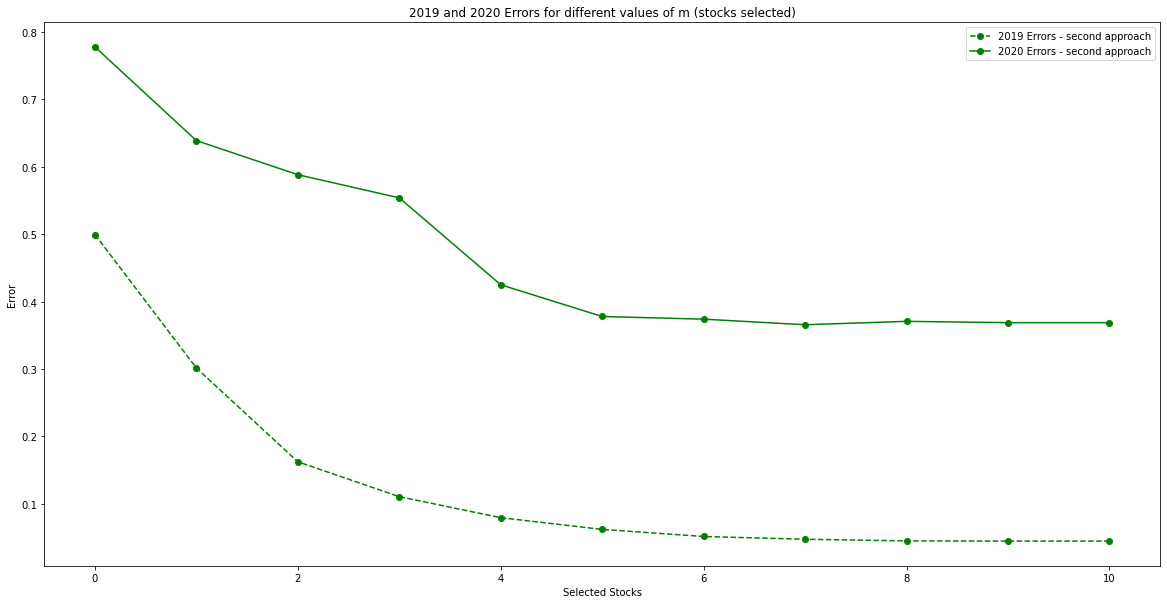

In [681]:
plt.figure(figsize=(20, 10))

plt.plot(complex_errors_df['2019_errors_complex'], label='2019 Errors - second approach', marker='o',  color='green', linestyle='--')
plt.plot(complex_errors_df['2020_errors_complex'], label='2020 Errors - second approach', marker='o',  color='green')
# Add a legend
plt.legend()

# Add labels and title
plt.xlabel('Selected Stocks')
plt.ylabel('Error')
plt.title('2019 and 2020 Errors for different values of m (stocks selected)')

#### Comparing the results from our first approach ( based on correlation ) and second approach ( minimizing index returns difference) for stock selection

In [689]:
combined_df = simple_error_df.reset_index()

In [693]:
combined_df['2019_errors_complex'] = complex_errors_df['2019_errors_complex']
combined_df['2020_errors_complex'] = complex_errors_df['2020_errors_complex']
combined_df.set_index('selected_stocks', inplace = True)
combined_df

,stock_selection_objective,2019_errors,2020_errors,2019_errors_complex,2020_errors_complex
selected_stocks,,,,,
5,54.841179,0.789178,1.112437,0.499259,0.777362
10,59.333081,0.701218,1.102404,0.301498,0.638550
20,66.648971,0.466233,0.855213,0.162433,0.587937
30,72.697515,0.413754,0.769412,0.110752,0.553649
40,78.259750,0.369479,0.759083,0.079619,0.424802
50,83.316676,0.334688,0.783056,0.062217,0.377808
60,87.877830,0.334359,1.059970,0.051720,0.373836
70,92.062665,0.233021,0.857701,0.047631,0.365585
80,95.729016,0.148219,0.545540,0.045227,0.370600


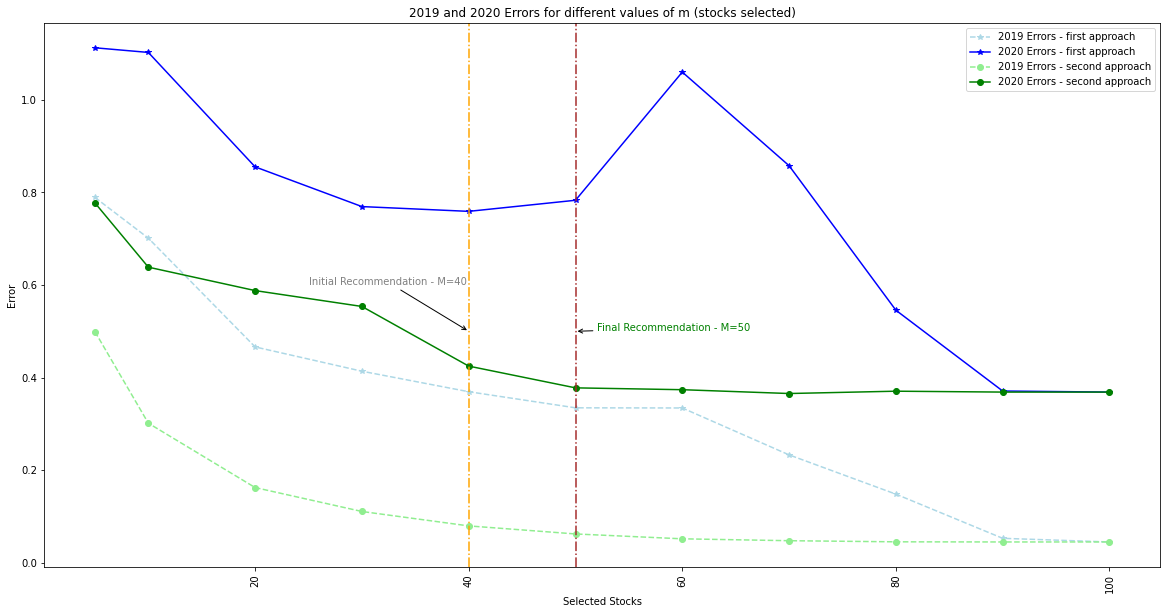

In [711]:

# Create a figure and set its size
plt.figure(figsize=(20, 10))

# Create a line chart for 2019 errors
plt.plot(combined_df['2019_errors'], label='2019 Errors - first approach', marker='*', color='lightblue', linestyle='--')
plt.plot(combined_df['2020_errors'], label='2020 Errors - first approach', marker='*', color='blue')

plt.plot(combined_df['2019_errors_complex'], label='2019 Errors - second approach', marker='o', color='lightgreen', linestyle='--')
plt.plot(combined_df['2020_errors_complex'], label='2020 Errors - second approach', marker='o', color='green')

# Add labels and title
plt.xlabel('Selected Stocks')
plt.ylabel('Error')
plt.title('2019 and 2020 Errors for different values of m (stocks selected)')

# Add a legend
plt.legend()

# Add a dotted line at x=40 and label
plt.axvline(x=40, color='orange', linestyle='-.', label='Recommended Value - M=40')
plt.annotate('Initial Recommendation - M=40', xy=(40, 0.5), xytext=(25, 0.6), color='gray', arrowprops=dict(arrowstyle='->'))

# Add a dotted line at x=50 and label (corrected the x value and label text)
plt.axvline(x=50, color='brown', linestyle='-.', label='Final Recommendation - M=50')
plt.annotate('Final Recommendation - M=50', xy=(50, 0.5), xytext=(52, 0.5), color='green', arrowprops=dict(arrowstyle='->'))

# Show all x-axis values
plt.xticks(rotation=90)  # Rotate the x-axis labels by 90 degrees

plt.show()
